# 1. Nhập thư viện

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
from scipy import stats


%matplotlib inline
# Tắt tất cả cảnh báo
warnings.filterwarnings('ignore')

# 2. Thông tin về tập dữ liệu

## 2.1. Đọc và hiển thị 5 dòng đầu dữ liêu

In [235]:
df = pd.read_csv('../data/Bank_Personal_Loan_Modelling.csv')
df.head(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

## 2.2. Kiểm tra tổng số dòng và số cột của tập dữ liệu

In [236]:
df.shape

(5000, 14)

Bộ dữ liệu gồm:

    * 5000 dòng
    
    *  14 cột

## 2.3. Chi tiết các cột trong tập dữ liêu

In [237]:
display(df.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

## Thông tin về tập dữ liệu:
<table border="1">
  <tr>
    <th>STT</th>
    <th>Cột</th>
    <th>Mô tả</th>
  </tr>
  <tr>
    <td>1</td>
    <td>ID</td>
    <td>Mã của khách hàng.</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Age</td>
    <td>Tuổi của khách hàng.</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Experience</td>
    <td>Số năm kinh nghiệm làm việc của khách hàng</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Income</td>
    <td>Thu nhập hàng năm của khách hàng (nghìn)</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Zip Code</td>
    <td>Địa chỉ nhà theo Mã bưu điện (ZIP)</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Family</td>
    <td>Tống số người trong gia đình của khách hàng</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Ccavg</td>
    <td>Trung bình chi tiêu bằng thẻ tín dụng hàng tháng</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Education</td>
    <td>Trình độ học vấn (1: Bằng cử nhân, 2: Bằng thạc sĩ, 3: Bằng cấp cao/chuyên nghiệp)</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Mortgage</td>
    <td>Giá trị thế chấp nhà (nghìn)</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Personal Loan</td>
    <td>Khách hàng có chấp nhận khoản vay cá nhân được cung cấp trong dịch vụ trước hay không? (0: Không, 1: Có)</td>
  </tr>
  <tr>
    <td>11</td>
    <td>Securities Account</td>
    <td>Khách hàng hiện đang có tài khoản chứng khoán tại ngân hàng không? (0: Không, 1: Có)</td>
  </tr>
  <tr>
    <td>12</td>
    <td>CD Account</td>
    <td>Khách hàng có chứng nhận tài khoản tiền gửi (CD) tại ngân hàng không? (0: Không, 1: Có)</td>
  </tr>
  <tr>
    <td>13</td>
    <td>Online</td>
    <td>Khách hàng có sử dụng các dịch vụ ngân hàng trực tuyến không? (0: Không, 1: Có)</td>
  </tr>
  <tr>
    <td>14</td>
    <td>CreditCard</td>
    <td>Khách hàng có sử dụng thẻ tín dụng do ngân hàng phát hành không? (0: Không, 1: Có)</td>
  </tr>
</table>

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- Mỗi giá trị của ID là duy nhất và thực tế nó chỉ là một mã định danh không mang thông tin có giá trị cho mô hình. Vì vậy, nhóm đã quyết định loại bỏ cột này.

In [239]:
df.drop('ID', axis=1, inplace=True)

## 2.4. Kiểm tra describe các biến có giá tri là số


In [240]:
df.describe().T

count          mean          std     min      25%  \
Age                 5000.0     45.338400    11.463166    23.0     35.0   
Experience          5000.0     20.104600    11.467954    -3.0     10.0   
Income              5000.0     73.774200    46.033729     8.0     39.0   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.0   
Family              5000.0      2.396400     1.147663     1.0      1.0   
CCAvg               5000.0      1.937938     1.747659     0.0      0.7   
Education           5000.0      1.881000     0.839869     1.0      1.0   
Mortgage            5000.0     56.498800   101.713802     0.0      0.0   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.0   
Securities Account  5000.0      0.104400     0.305809     0.0      0.0   
CD Account          5000.0      0.060400     0.238250     0.0      0.0   
Online              5000.0      0.596800     0.490589     0.0      0.0   
CreditCard          5000.0      0.294000     0.455637     0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIP Code            93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal Loan           0.0      0.0      1.0  
Securities Account      0.0      0.0      1.0  
CD Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

* Nhận xét: Bộ dữ liệu này bao gồm nhiều thông tin khác nhau về độ tuổi, kinh nghiệm, thu nhập, tình trạng gia đình, chi tiêu thẻ tín dụng, trình độ học vấn, và các loại tài khoản ngân hàng. Các giá trị phân vị và độ lệch chuẩn cung cấp cái nhìn tổng quan về sự phân phối của các biến này.

# 3. Phân tích mối tương quan

In [241]:
# Xác định bản màu
gray_white = LinearSegmentedColormap.from_list('gray_white', [(0, (1, 1, 1)), (1, (0.5, 0.5, 0.5))])
gray_white_r = gray_white.reversed()

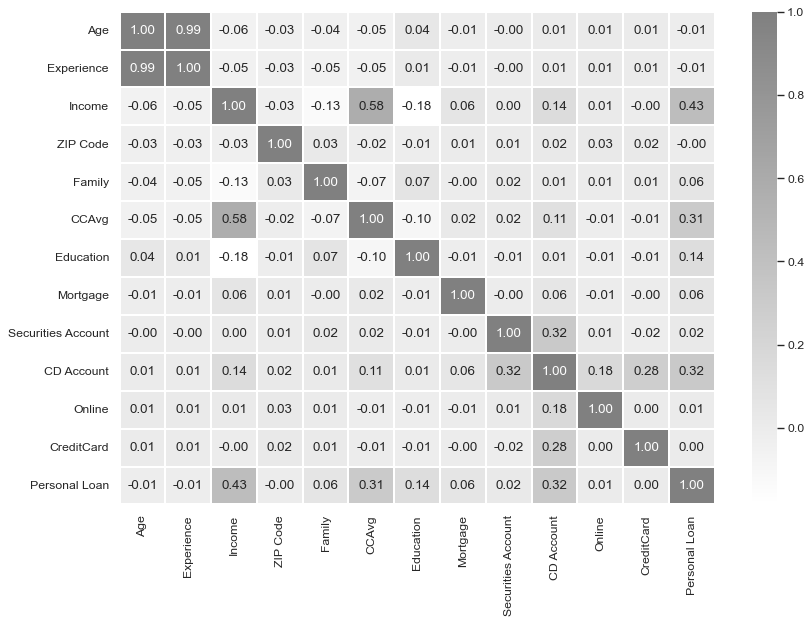

In [242]:
# Tính toán tương quan Spearman
target = 'Personal Loan'
df_ordered = pd.concat([df.drop(target, axis=1), df[target]], axis=1)
corr = df_ordered.corr(method='spearman')

# Vẽ heatmap
plt.figure(figsize=(12, 8), dpi=80)
sns.heatmap(corr, annot=True, cmap=gray_white, fmt='.2f', linewidths=0.2)
plt.show()

# 4. Tiền xử lý dữ liệu

## 4.1. Xử lý nhiễu

### 4.1.1. Cột ZIP Code:

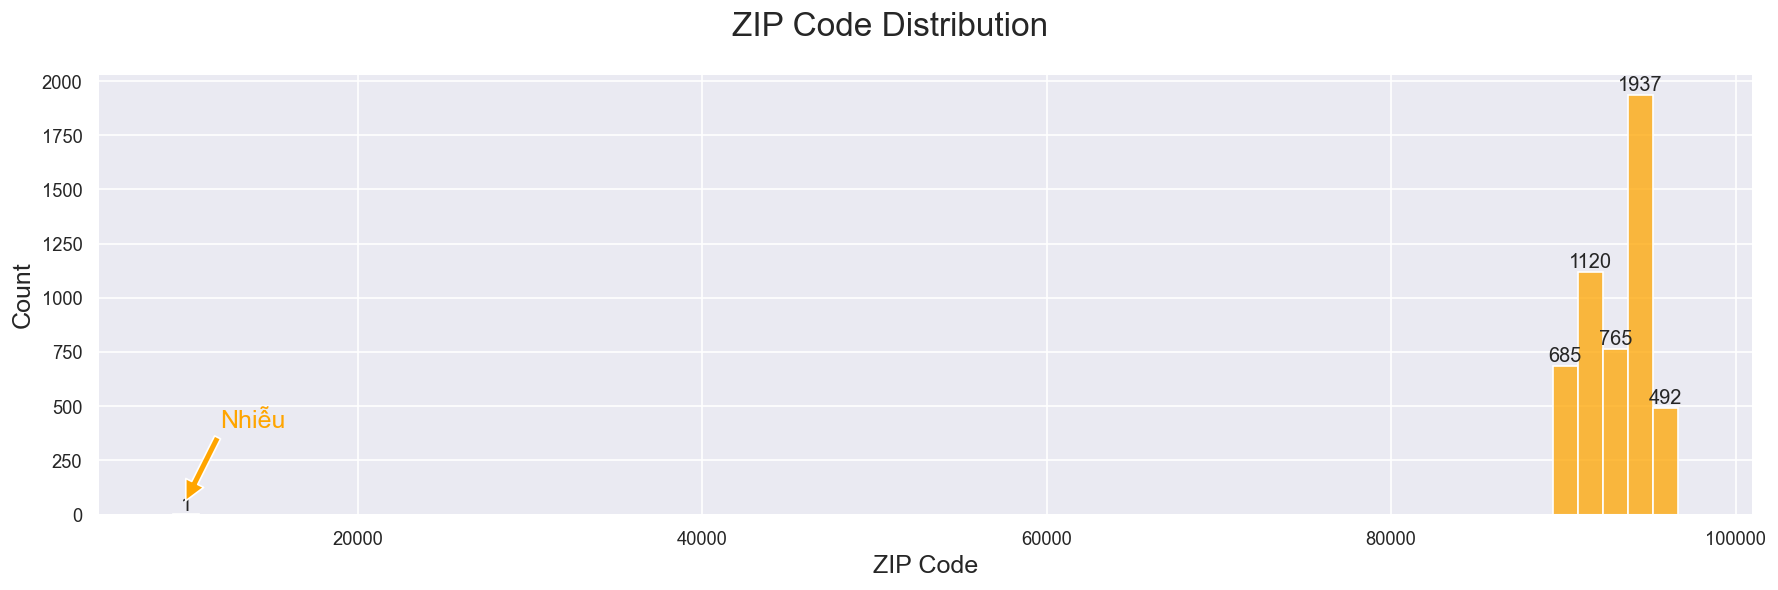

In [243]:
# Đặt style cho seaborn
sns.set_style('darkgrid')

# Định nghĩa màu cam
orange_color = 'orange'

# Hàm để tạo biểu đồ
def plot_zip_code_distribution(df, color):
    plt.figure(figsize=(15, 5), dpi=120)
    graph = sns.histplot(x='ZIP Code', data=df, bins=60, color=color)

    # Hiển thị giá trị khác 0
    labels = [str(v) if v else '' for v in graph.containers[0].datavalues]
    graph.bar_label(graph.containers[0], labels=labels)

    plt.annotate('Nhiễu', xy=(10000, 60), xytext=(12000, 400), color=color, fontsize=15,
                 arrowprops=dict(facecolor=color, shrink=0.01))
    plt.xlabel('ZIP Code', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.suptitle('ZIP Code Distribution', fontsize=20)
    plt.tight_layout()
    plt.show()

# Giả sử df là DataFrame của bạn
# df = pd.read_csv('your_data.csv')  # Hoặc bất kỳ cách nào bạn load dữ liệu

# Gọi hàm để vẽ biểu đồ
plot_zip_code_distribution(df, orange_color)

In [244]:
df[df['ZIP Code']<20000]

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
384   51          25      21      9307       4    0.6          3         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
384              0                   0           0       1           1

In [245]:
df.drop(df[df['ZIP Code']<20000].index, inplace=True)
df.reset_index(drop=True, inplace =True)

### 4.1.2. Cột Experience
- Kinh nghiệm làm việc không thể có giá trị âm

In [246]:
df[df['Experience']<0]['Experience'].count()

52

In [247]:
df[df['Experience']<0]['Experience'].value_counts()

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

- Ta thấy số lượng các giá trị nhiễu trong cột Experience rất nhỏ so với tập dữ liệu => có thể nó đã bị nhập nhầm?  
=> Tiến hành thay thế các giá trị nhiễu này thành giá trị tuyệt đối

In [248]:
df['Experience'] = df['Experience'].apply(abs)

- Kiểm tra lại

In [249]:
df[df['Experience']<0]['Experience'].count()

0

## 4.2. Xử lý dữ liệu Outlier

- Xem xét sự phân bố dữ liệu trong cột Mortgage

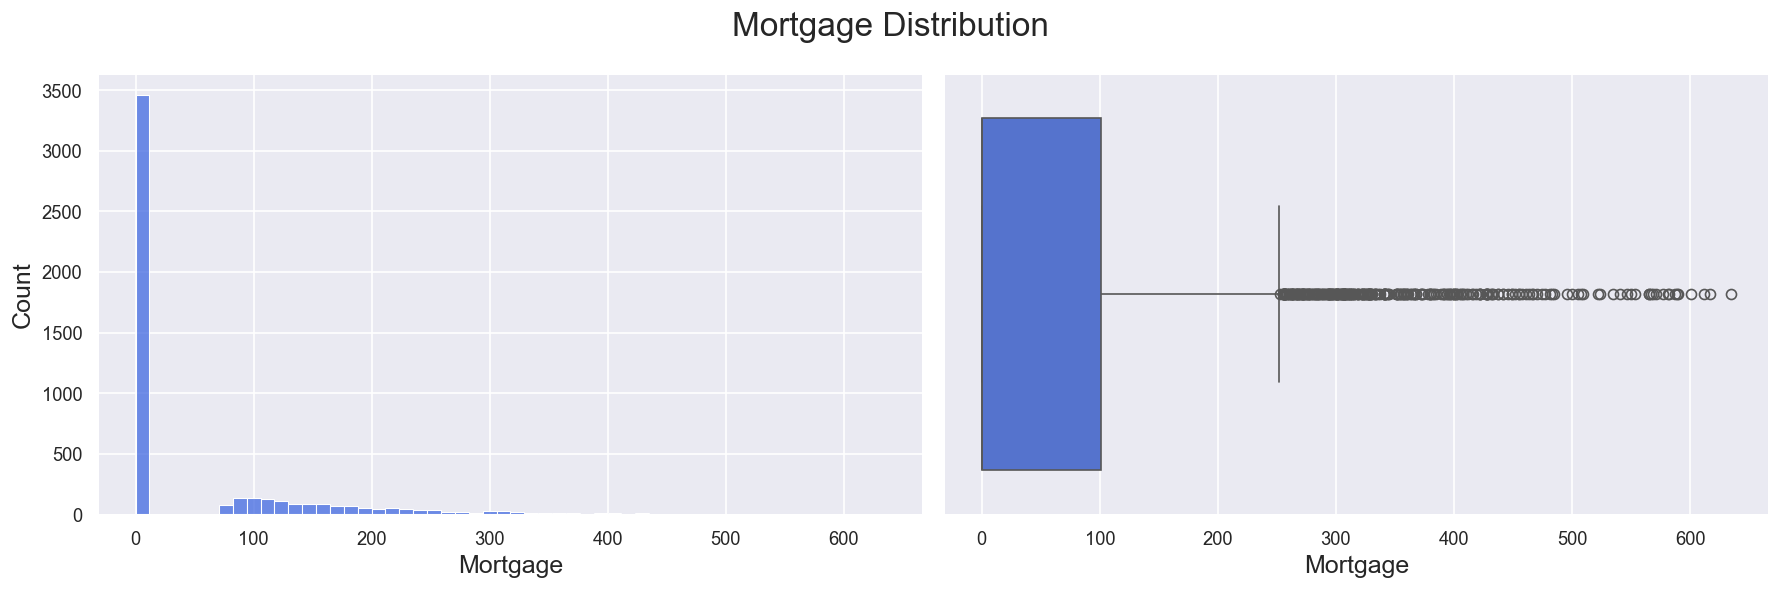

In [250]:
sns.set(rc = {'axes.labelsize' : 15})
fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=120)
sns.histplot(x='Mortgage', data=df, color='royalblue', ax=ax[0])
sns.boxplot(x='Mortgage', data=df, color='royalblue', ax=ax[1])
plt.suptitle('Mortgage Distribution', fontsize=20)
plt.tight_layout()
plt.show()

- Tiến hành kiểm tra các giá trị ngoại lai với phương pháp Z-score, các điểm dữ liệu có giá trị Z-score > 3 => là những Outlier cần được xử lý

In [251]:
df[stats.zscore(df['Mortgage'])>3]['Mortgage'].count()

105

- Có 105 điểm dữ liệu có giá trị Z-score > 3. Do đó, có thể coi 105 bản ghi này là Outlier và loại bỏ những bản ghi này khỏi tập dữ liệu

In [252]:
outlier_indexes = df[stats.zscore(df['Mortgage'])>3].index
df.drop(outlier_indexes, inplace=True)
df.reset_index(drop=True, inplace=True)

## 4.3. Xử lý dữ liệu bị thiếu (NULL)

In [253]:
df.isnull().sum() + df.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

- Có thể thấy, tập dữ liệu không có cột dữ liệu nào bị thiếu => clean dataset

## 4.4. Xử lý giá trị trùng lặp (Duplicate)

In [254]:
# Đếm số dòng dữ liệu trùng lặp
num_duplicates = df.duplicated().sum()
print("Số dòng dữ liệu trùng lặp là:", num_duplicates)

Số dòng dữ liệu trùng lặp là: 0


- Như vậy, tập dataset không có các dòng dữ liệu trùng lặp nào

## 4.5. Biến đổi đặc trưng

- Trong tập dữ liệu, cột CCAVG thể hiện mức chi tiêu trung bình hàng tháng bằng thẻ tín dụng, nhưng cột Income thể hiện số tiền thu nhập hàng năm  
=> Chuyển đổi chi tiêu thẻ tín dụng trung bình hàng tháng thành hàng năm, để làm cho đơn vị của các tính năng bằng nhau

In [255]:
df['CCAvg'] = df['CCAvg']*12

# 5. Phân tích dữ liệu thăm dò (EDA) và Trực quan hóa

## 5.1 Phân tích chung

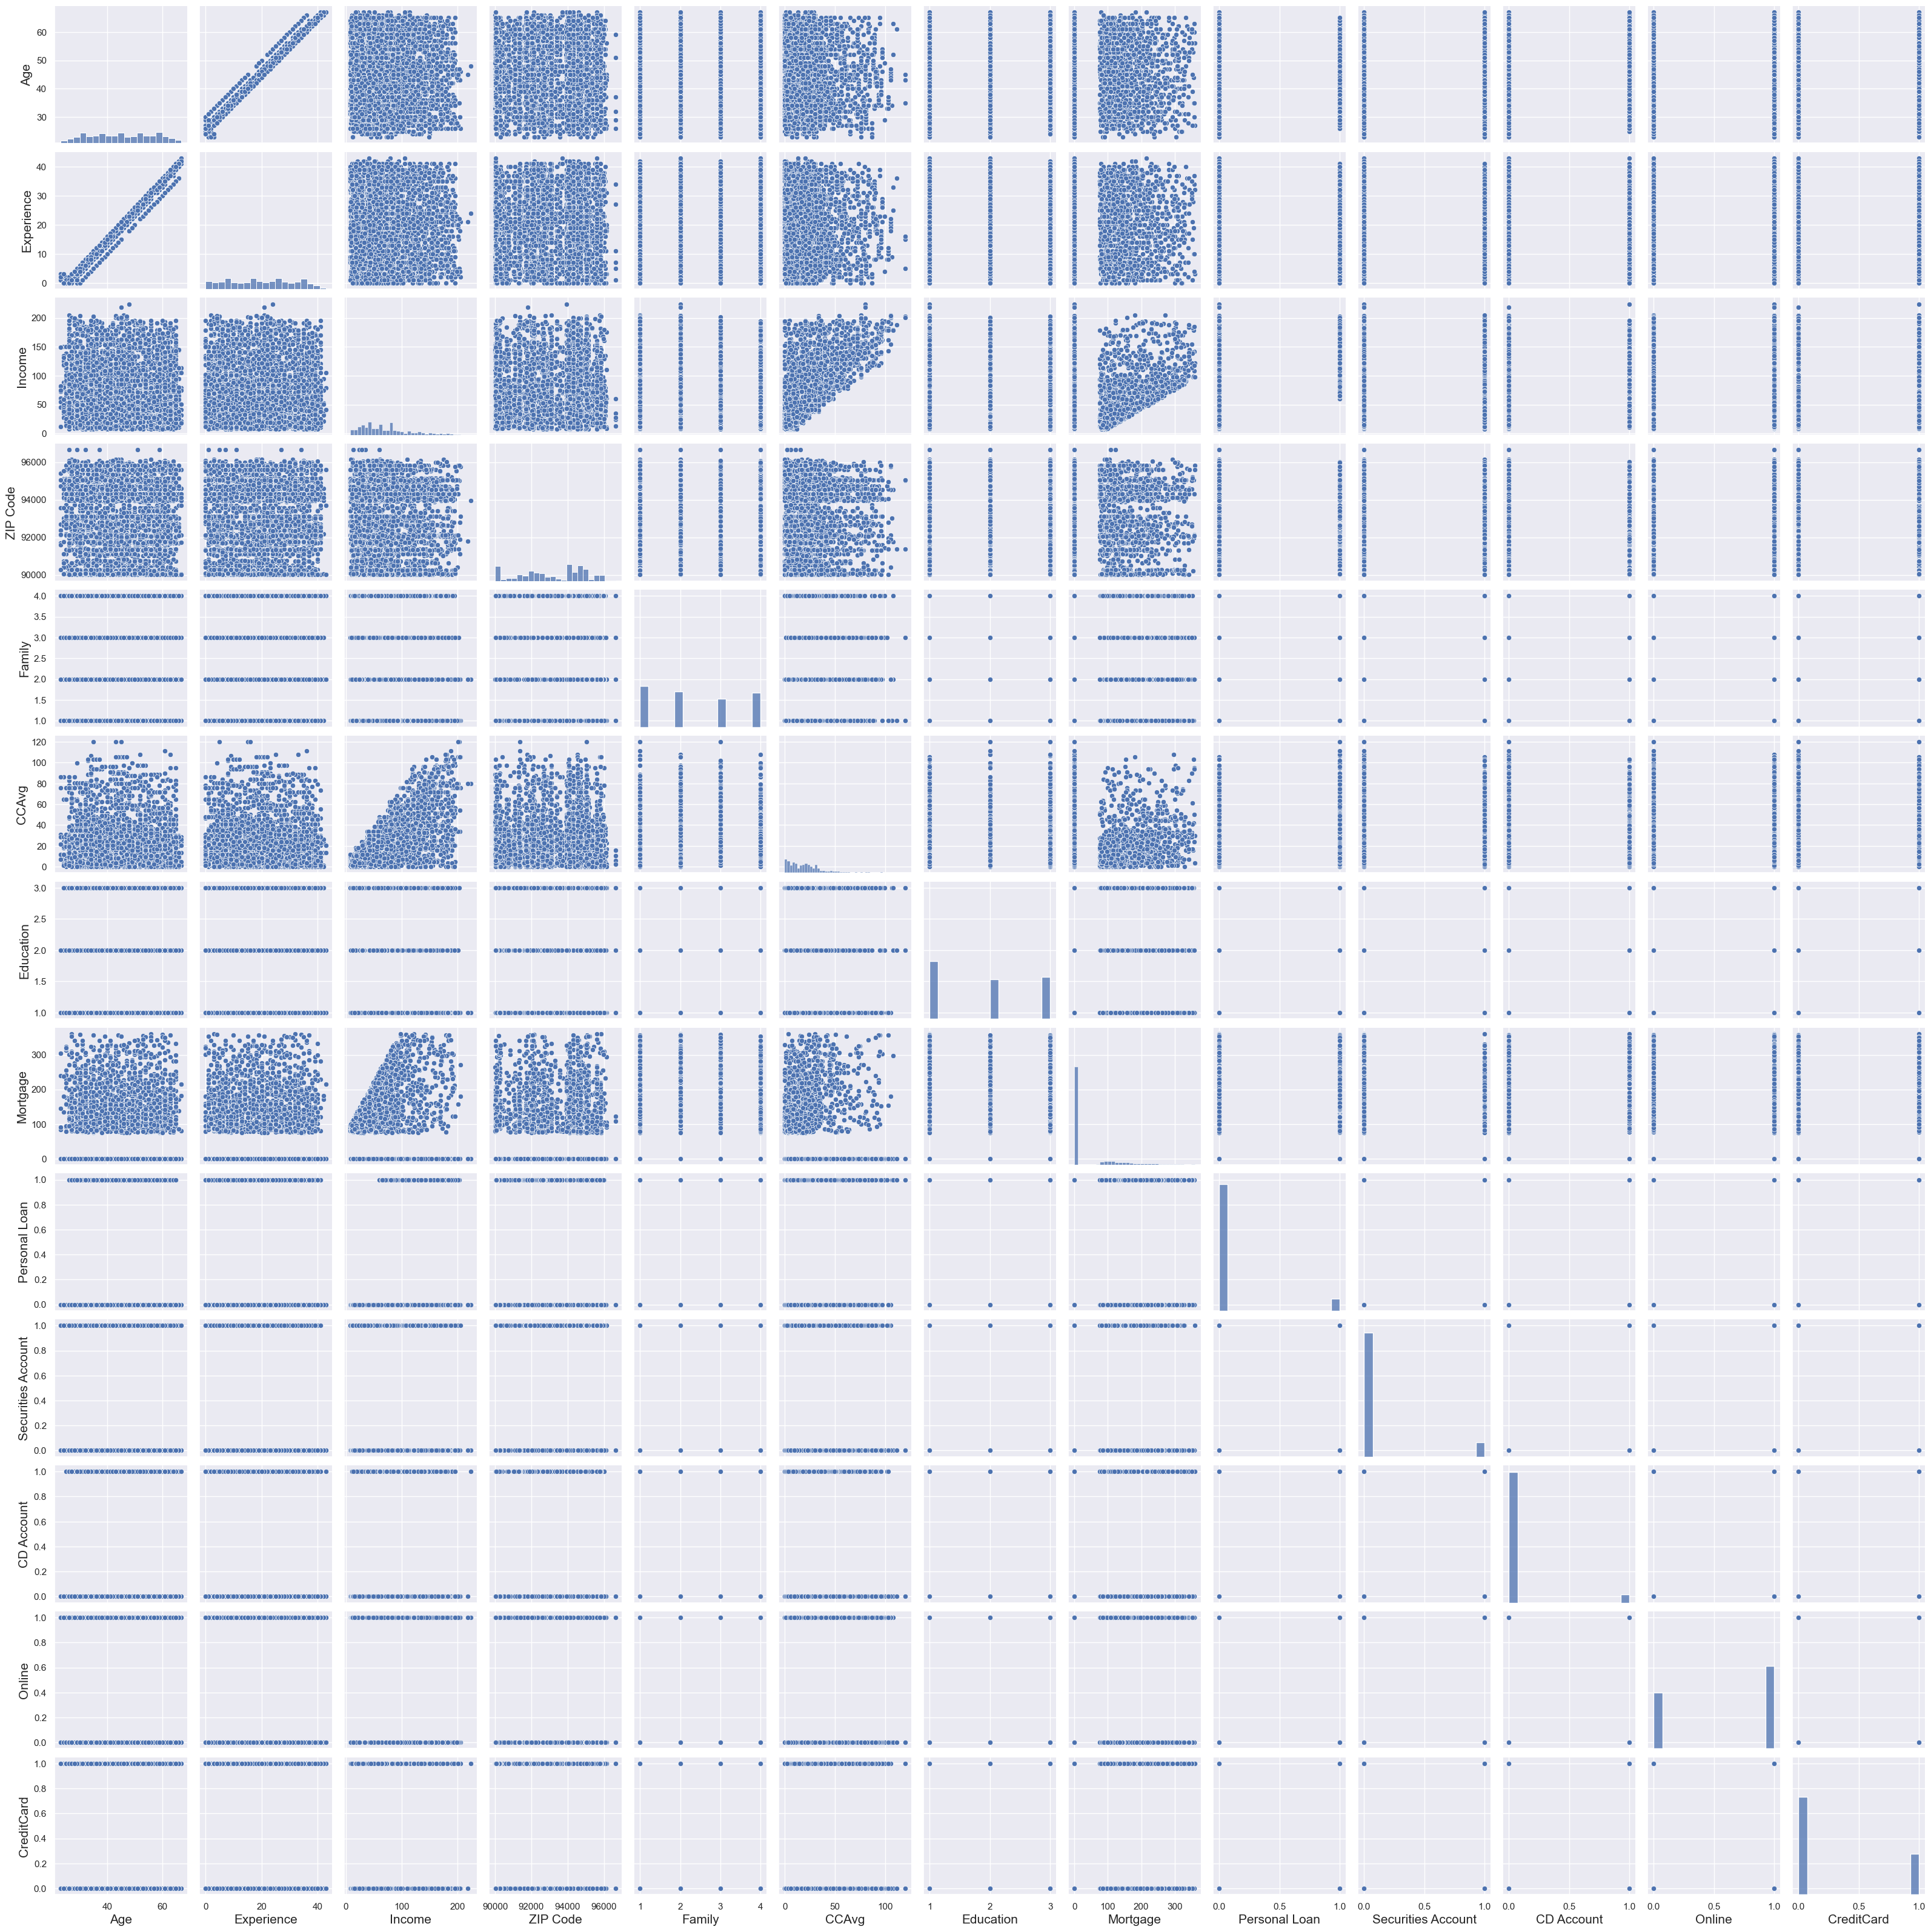

In [256]:
#Vẽ biểu đồ phân phối cho tất cả các cột
sns.pairplot(df)

**Nhận xét:**
- Nhìn vào các biểu đồ trên, chúng ta có thể nói rằng chi tiêu trung bình trên thẻ tín dụng (ccavg) và số tiền thế chấp (mortgage) tăng khi thu nhập tăng.
- Các cột age (tuổi) và experience (kinh nghiệm) có mối quan hệ tuyến tính rất rõ ràng.


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'ZIP Code'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Mortgage'}>],
       [<Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>,
        <Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>],
       [<Axes: title={'center': 'CreditCard'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

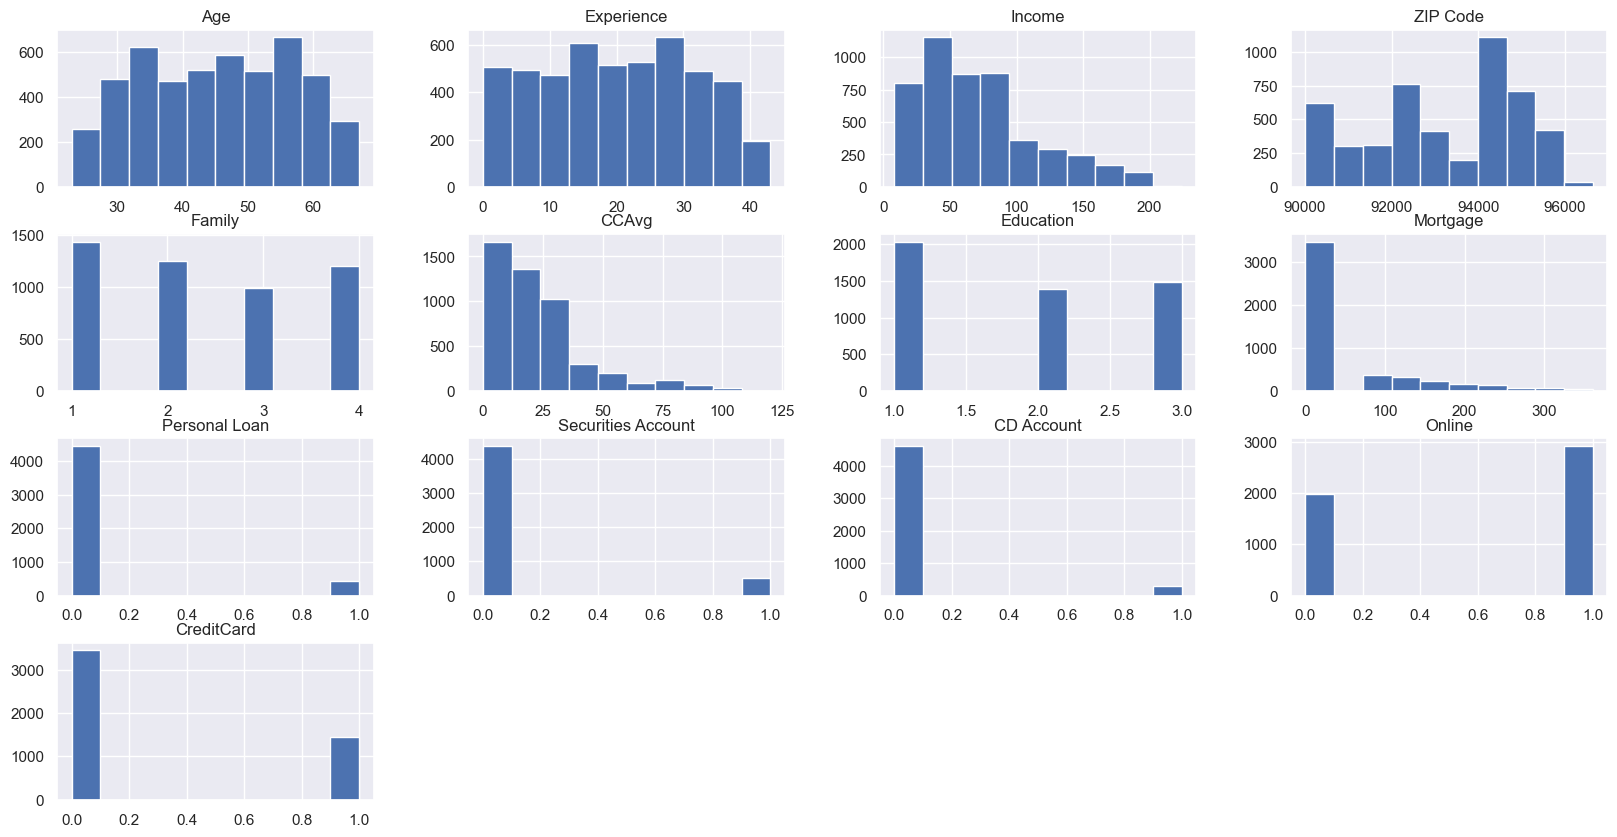

In [257]:
plt.rcParams["figure.figsize"] = (20,10)
df.hist()

Nhận xét: Tập dữ liệu gồm 2 loại dữ liệu
- Các biến phân loại: Family, Education, Personal Loan, Securities Account, CD Account,  Online và CreditCard

- Các biến liên tục: Age, Experience, Income, ZIP Code , CCAvg và Mortgage

## 5.2 Tìm hiểu các thông tin cột “Personal Loan”

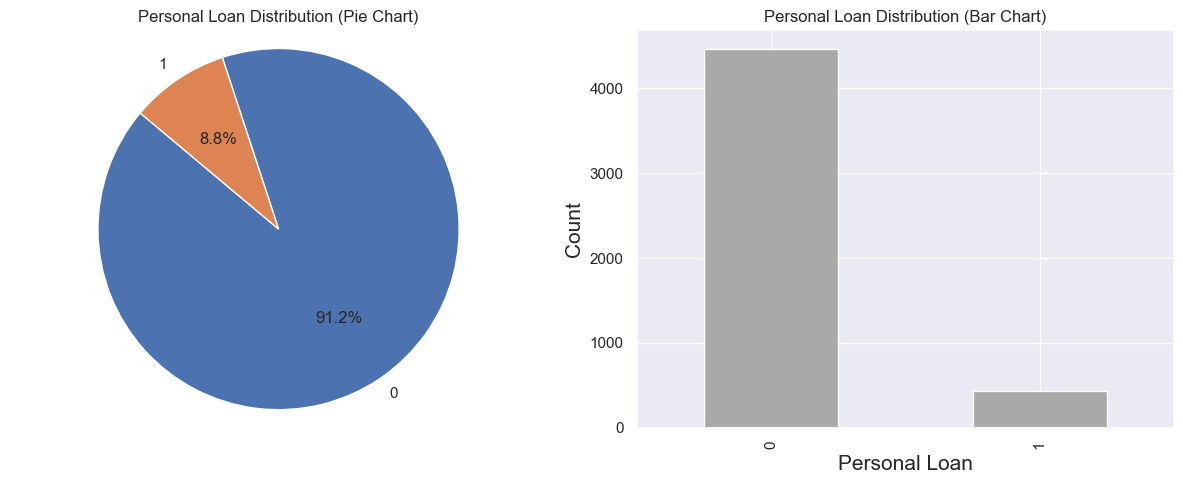

In [258]:
loan_counts = df['Personal Loan'].value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Personal Loan Distribution (Pie Chart)')

plt.subplot(1, 2, 2)
loan_counts.plot(kind='bar', color='darkgray')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.title('Personal Loan Distribution (Bar Chart)')

plt.tight_layout()

plt.show()

 **Nhận xét:**
- Biểu đồ cho thấy phần lớn (91.2%) khách hàng không có khoản vay cá nhân, trong khi chỉ có một phần nhỏ là có khoản vay.
- Sự phân bổ giữa 2 lớp phân loại <b>Personal Loan</b> là không đồng đều

## 5.3 Tìm hiểu các thông tin liên quan/ ảnh hưởng đến cột “Personal Loan”

### 5.3.1 Phân tích thông tin cá nhân khách hàng: Age, Experience, and Income

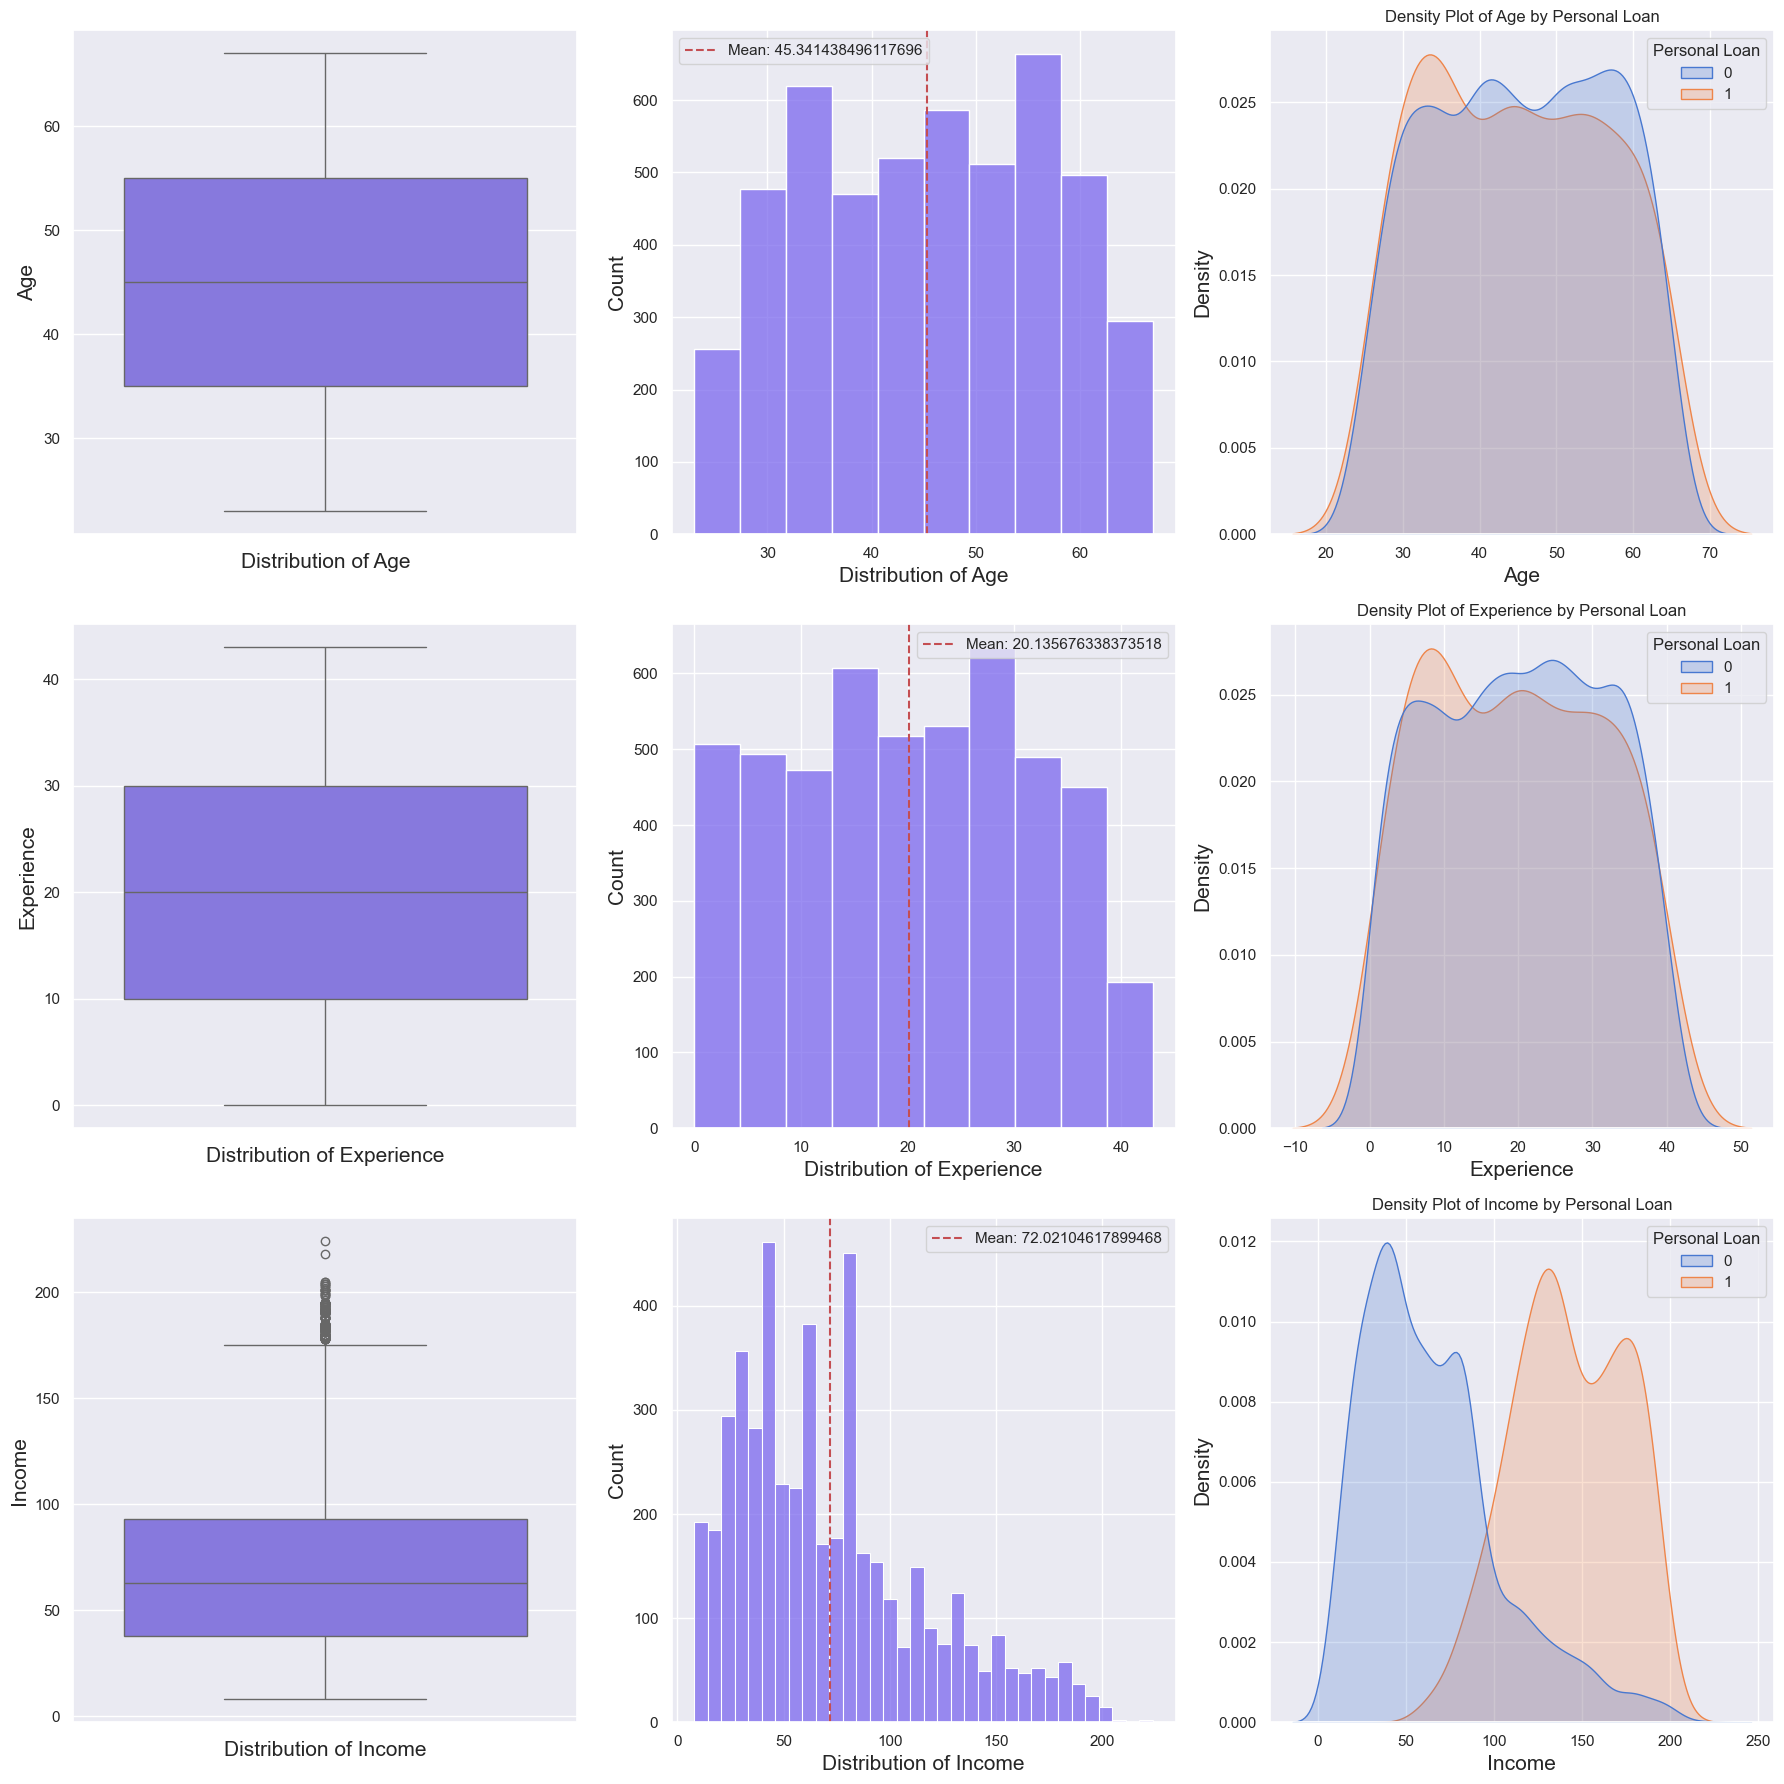

In [259]:
def draw_axvlines(ax, column):
    mean = df[column].mean()
    ax.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean}')
    ax.legend()

fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Biểu đồ Age
sns.boxplot(df["Age"], ax=axes[0][0], color="mediumslateblue")
axes[0][0].set(xlabel='Distribution of Age')

pp = sns.histplot(df["Age"], ax=axes[0][1], bins=10, color="mediumslateblue")
axes[0][1].set(xlabel='Distribution of Age')
draw_axvlines(pp, "Age")

sns.kdeplot(data=df, x='Age', hue='Personal Loan', fill=True, common_norm=False, palette='muted', ax=axes[0][2])
axes[0][2].set_title('Density Plot of Age by Personal Loan')
axes[0][2].set_xlabel('Age')
axes[0][2].set_ylabel('Density')

# Biểu đồ Experience
sns.boxplot(df["Experience"], ax=axes[1][0], color="mediumslateblue")
axes[1][0].set(xlabel='Distribution of Experience')

pp = sns.histplot(df["Experience"], ax=axes[1][1], bins=10, color="mediumslateblue")
axes[1][1].set(xlabel='Distribution of Experience')
draw_axvlines(pp, "Experience")

sns.kdeplot(data=df, x='Experience', hue='Personal Loan', fill=True, common_norm=False, palette='muted', ax=axes[1][2])
axes[1][2].set_title('Density Plot of Experience by Personal Loan')
axes[1][2].set_xlabel('Experience')
axes[1][2].set_ylabel('Density')

# Biểu đồ Income
sns.boxplot(df["Income"], ax=axes[2][0], color="mediumslateblue")
axes[2][0].set(xlabel='Distribution of Income')

pp = sns.histplot(df["Income"], ax=axes[2][1], color="mediumslateblue")
axes[2][1].set(xlabel='Distribution of Income')
draw_axvlines(pp, "Income")

sns.kdeplot(data=df, x='Income', hue='Personal Loan', fill=True, common_norm=False, palette='muted', ax=axes[2][2])
axes[2][2].set_title('Density Plot of Income by Personal Loan')
axes[2][2].set_xlabel('Income')
axes[2][2].set_ylabel('Density')

plt.tight_layout()

plt.show()


Bởi vì độ tương quan giữa experience và age rất cao nên ta có thể loại bỏ cột Experience để giảm số chiều khi ta thực hiện áp dụng các mô hình cho việc phân loại hay dự báo bằng lệnh df.drop('Experience', axis=1, inplace=True)

**Nhận xét 1:**

Tuổi (Age):

- Biểu đồ boxplot cho thấy phân phối rất đồng đều xung quanh giá trị trung bình và không có các điểm ngoại lai.
- Biểu đồ histogram cho thấy có một phân phối đối xứng và giá trị trung bình cũng như Q2 gần như là như nhau.
- Có một số đỉnh nhỏ tại các vị trí của Q1, Q2 và Q3.

Kinh nghiệm (Experience):

- Phân phối rất tương tự như của Age.
- Giá trị trung bình và Q2 giống nhau. Có một phân phối đối xứng.
  
Thu nhập (Income):

- Biểu đồ boxplot cho thấy một số điểm ngoại lai vượt qua ngưỡng trên.
- Biểu đồ histogram cho thấy phân phối hướng phải phân phối bên phải.

**Nhận xét 2:**

Biểu Đồ Mật Độ Tuổi Theo Khoản Vay Cá Nhân:

- Có hai phân phối chồng lên nhau, một cho những người có khoản vay cá nhân (màu cam) và một cho những người không có (màu xanh).
- Cả hai đều đạt đỉnh xung quanh độ tuổi 40, nhưng phân phối cho những người có khoản vay cá nhân có xu hướng dịch chuyển sang phải, cho thấy độ tuổi cao hơn.

Biểu Đồ Mật Độ Kinh Nghiệm Theo Khoản Vay Cá Nhân:

- Hai phân phối gần như giống hệt nhau, đều đạt đỉnh ở khoảng 20 năm kinh nghiệm.

Biểu Đồ Mật Độ Thu Nhập Theo Khoản Vay Cá Nhân:

- Có sự phân biệt rõ ràng; những cá nhân có thu nhập cao hơn có xu hướng vay cá nhân, như được chỉ ra bởi phân phối màu cam đạt đỉnh ở mức thu nhập cao hơn.

Nhìn chung, biểu đồ cho thấy rằng tuổi tác và thu nhập có thể là những yếu tố quan trọng ảnh hưởng đến quyết định vay cá nhân, trong khi kinh nghiệm không cho thấy sự khác biệt đáng kể giữa hai nhóm. Điều này có thể hữu ích cho các tổ chức tài chính khi xem xét hồ sơ vay và chiến lược tiếp thị của họ

### 5.3.2 Phân tích thông tin cá nhân khách hàng: Family, Education, Securities Account

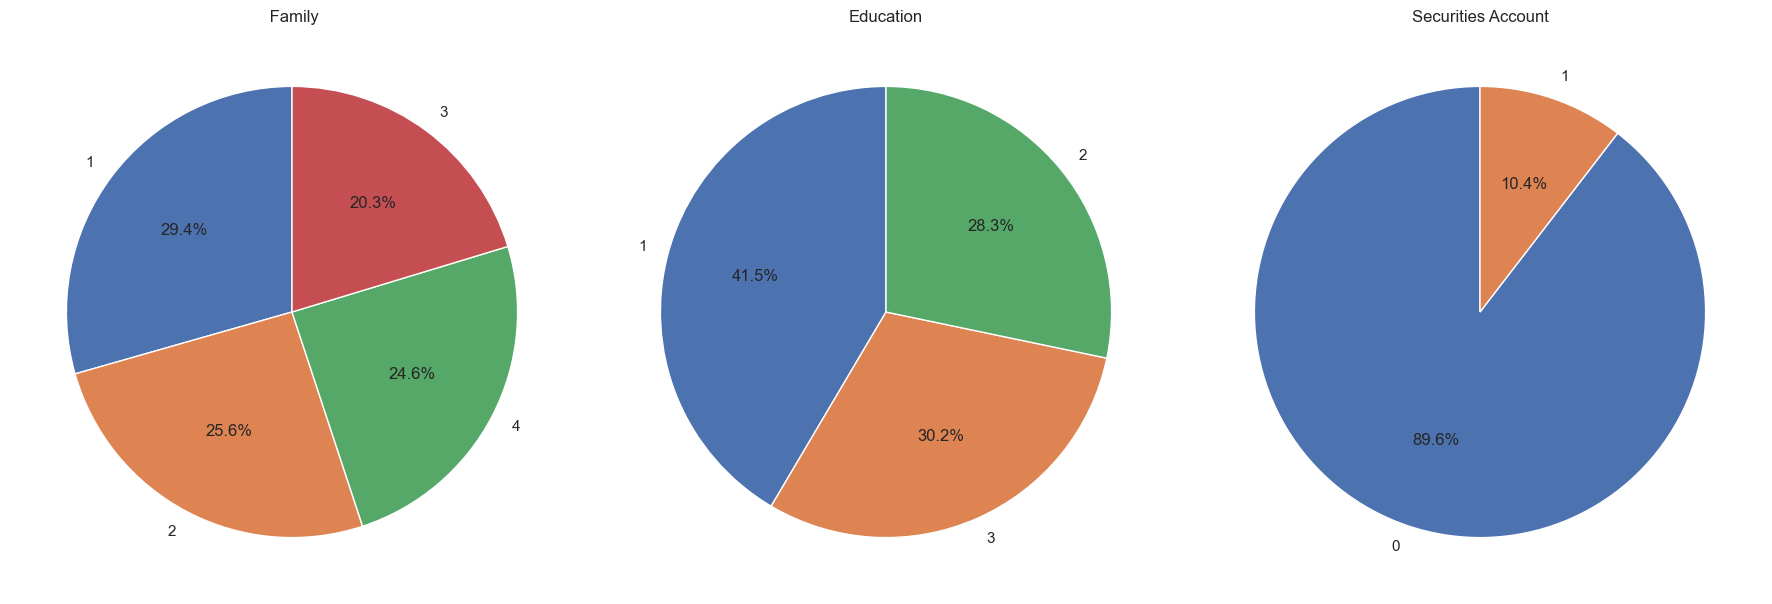

In [260]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

cd_loan_counts = df['Family'].value_counts()
cd_loan_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90)
axes[0].set_title(' Family')
axes[0].set_ylabel('')

online_loan_counts = df['Education'].value_counts()
online_loan_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Education')
axes[1].set_ylabel('')

creditcard_loan_counts = df['Securities Account'].value_counts()
creditcard_loan_counts.plot(kind='pie', ax=axes[2], autopct='%1.1f%%', startangle=90)
axes[2].set_title('Securities Account')
axes[2].set_ylabel('')

plt.tight_layout()

plt.show()

Biểu Đồ Gia Đình (Family):
- Phần trăm của từng loại gia đình khá đều.
- Phân đoạn màu xanh (29.4%) có vẻ là lớn nhất, cho thấy đó là loại gia đình phổ biến nhất trong dữ liệu.

Biểu Đồ Học Vấn (Education):
- Phân đoạn màu xanh chiếm ưu thế lớn (41.5%), có thể chỉ ra rằng đa số mọi người trong dữ liệu có trình độ học vấn này.

Biểu Đồ tài khoản chứng khoán tại ngân hàng (Securities Account):
- Phân đoạn màu xanh lớn (89.6%) cho thấy rằng đa số mọi người không sở hữi tài khoản chứng khoán.

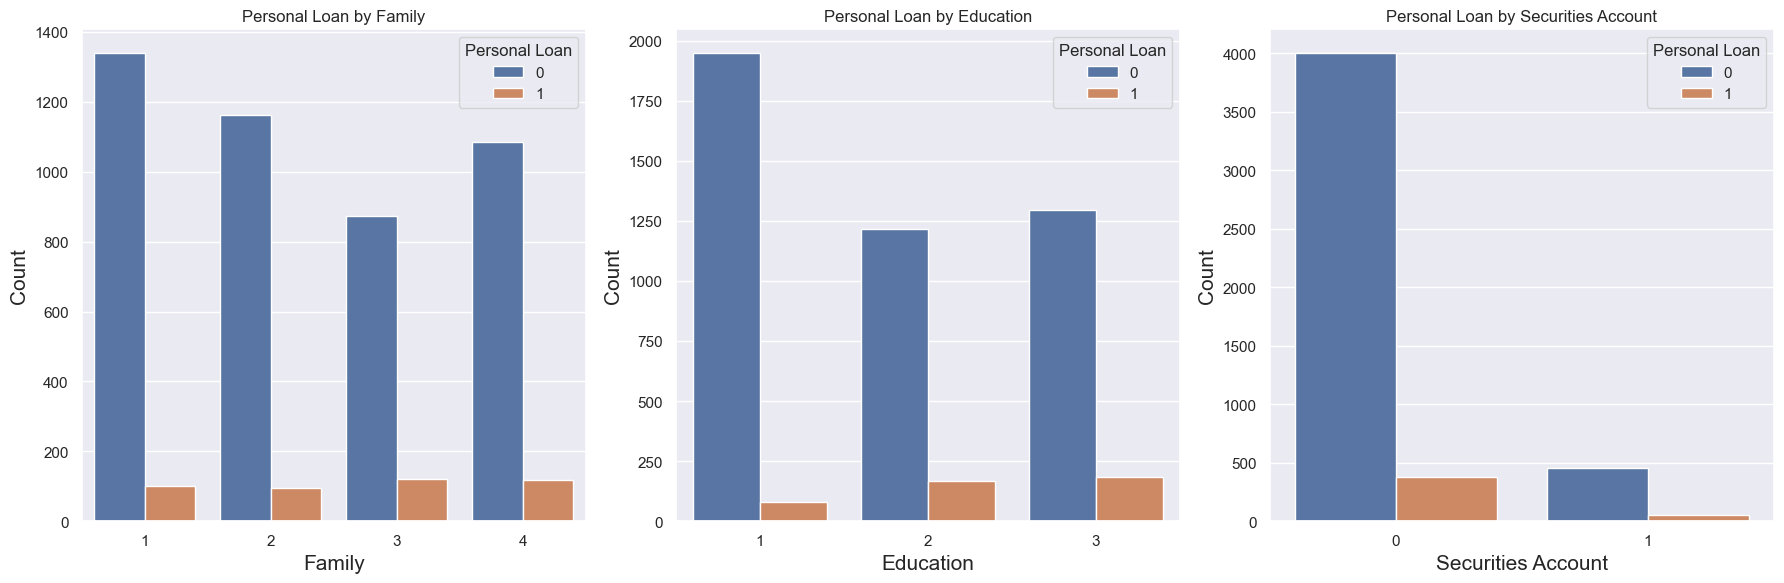

In [261]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=df, x='Family', hue='Personal Loan', ax=axes[0])
axes[0].set_title('Personal Loan by Family')
axes[0].set_xlabel('Family')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='Education', hue='Personal Loan', ax=axes[1])
axes[1].set_title('Personal Loan by Education')
axes[1].set_xlabel('Education')
axes[1].set_ylabel('Count')

sns.countplot(data=df, x='Securities Account', hue='Personal Loan', ax=axes[2])
axes[2].set_title('Personal Loan by Securities Account')
axes[2].set_xlabel('Securities Account')
axes[2].set_ylabel('Count')

plt.tight_layout()

plt.show()


 **Nhận xét:**
- tỉ lệ chấp nhận khoản vay cao khi khách hàng đó có: số lượng thành viên trong gia đình cao, trình độ học vấn cao
- Thuộc tính có tài khoản chứng khoán có vẻ không có tương quan với tỉ lệ chấp nhận khoản vay

### 5.3.3. Phân tích thông tin cá nhân khách hàng:  CD Account, Online, CreditCard

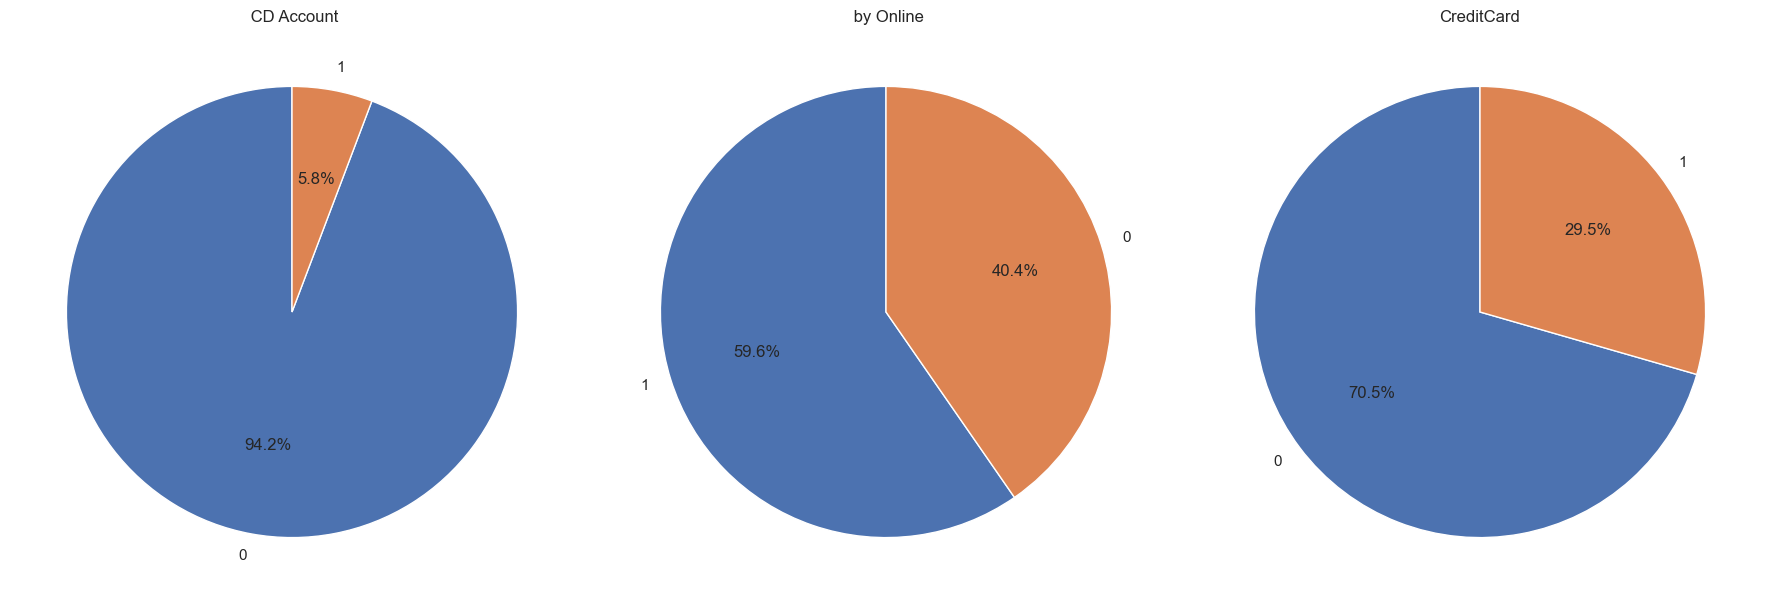

In [262]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

cd_loan_counts = df['CD Account'].value_counts()
cd_loan_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90)
axes[0].set_title(' CD Account')
axes[0].set_ylabel('')

online_loan_counts = df['Online'].value_counts()
online_loan_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title(' by Online')
axes[1].set_ylabel('')

creditcard_loan_counts = df['CreditCard'].value_counts()
creditcard_loan_counts.plot(kind='pie', ax=axes[2], autopct='%1.1f%%', startangle=90)
axes[2].set_title('CreditCard')
axes[2].set_ylabel('')

plt.tight_layout()

plt.show()

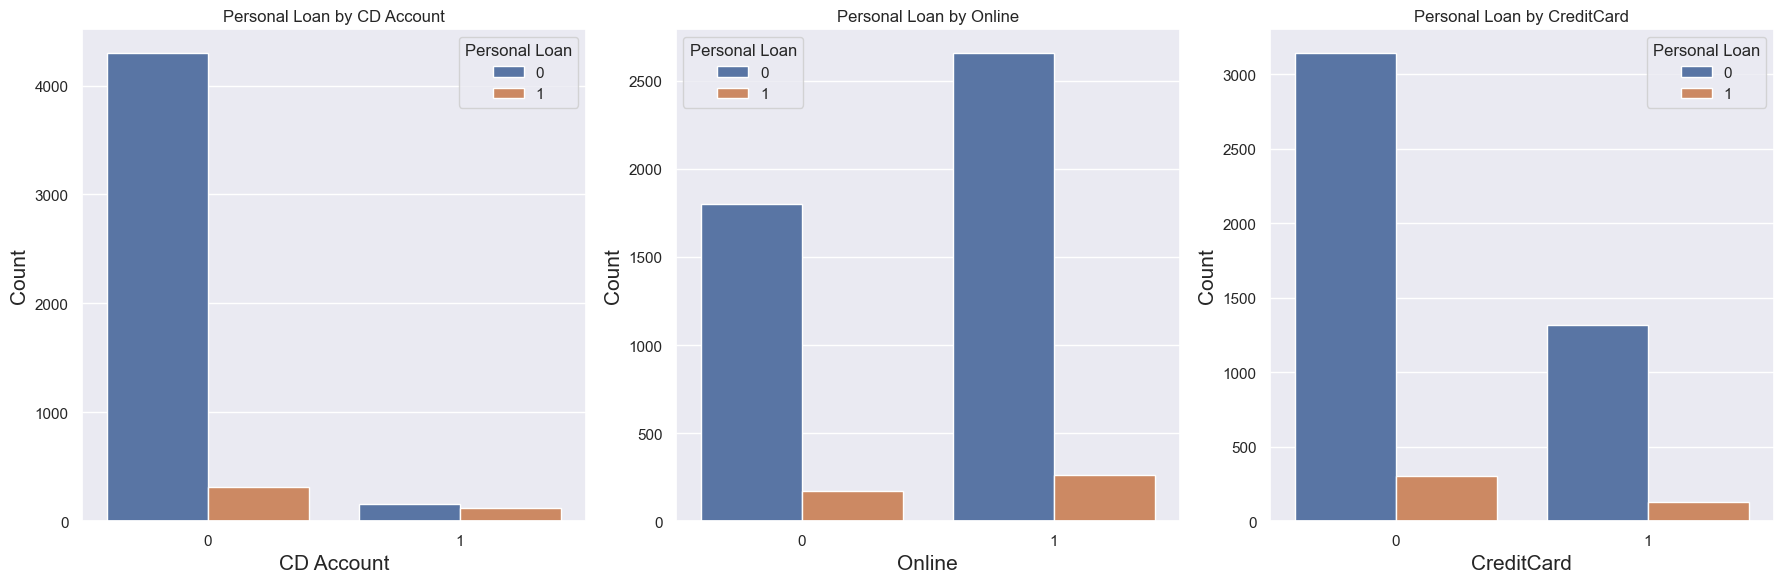

In [263]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=df, x='CD Account', hue='Personal Loan', ax=axes[0])
axes[0].set_title('Personal Loan by CD Account')
axes[0].set_xlabel('CD Account')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='Online', hue='Personal Loan', ax=axes[1])
axes[1].set_title('Personal Loan by Online')
axes[1].set_xlabel('Online')
axes[1].set_ylabel('Count')

sns.countplot(data=df, x='CreditCard', hue='Personal Loan', ax=axes[2])
axes[2].set_title('Personal Loan by CreditCard')
axes[2].set_xlabel('CreditCard')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Nhận xét:**
- CD Account: Những khách hàng có chứng nhận tài khoản tiền gửi tại ngân hàng (CD Account) thường chấp nhận "personal loan"
- Online: Việc sử dụng các dịch vụ trực tuyến không ảnh hưởng tới chấp nhận "personal loan"
- CreditCard: Việc sử dụng thẻ tín dụng cũng không ảnh hưởng tới chấp nhận "personal loan"

### 5.3.2. Phân tích thông tin cá nhân khách hàng: CCAvg, Mortgage

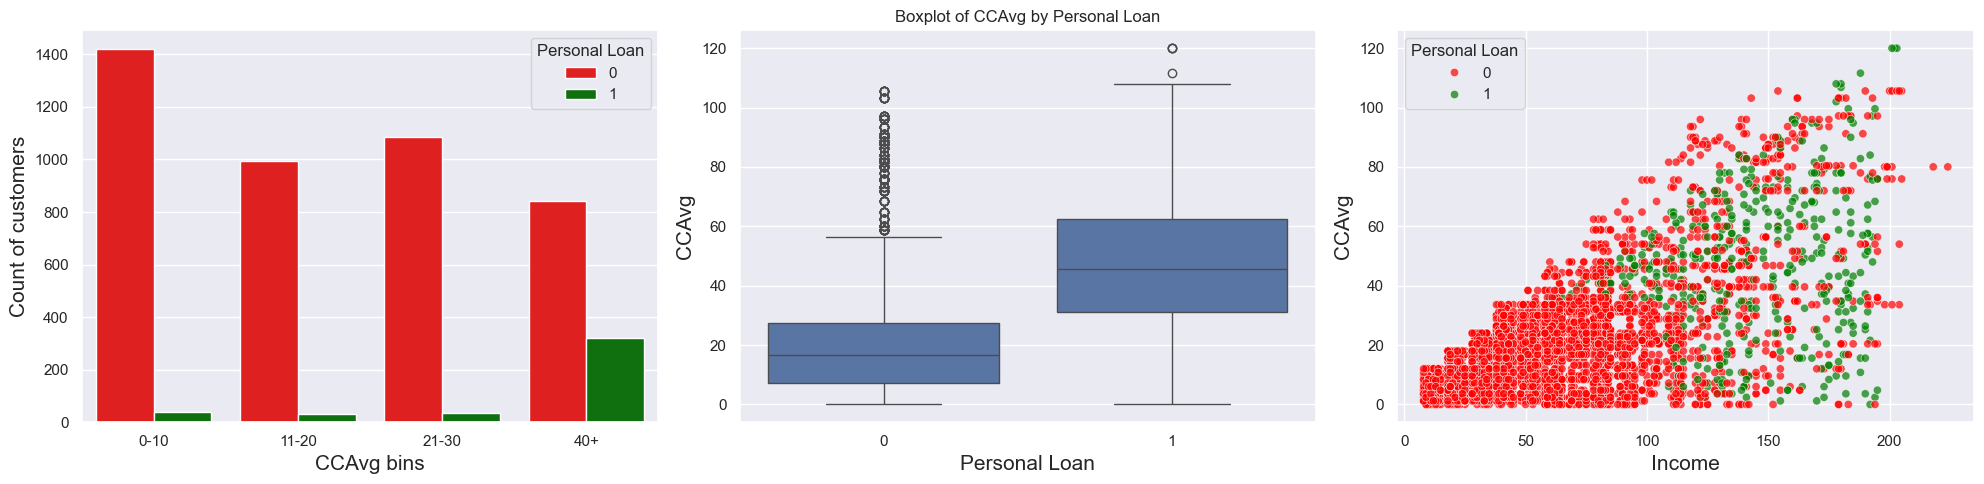

In [264]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Biểu đồ barplot cho CCAvg bins và Personal Loan
xx = df[["CCAvg",  "Personal Loan"]]
xx['ccavg_bin'] = pd.cut(xx['CCAvg'], bins=[0, 10, 20, 30, 100], labels=['0-10', '11-20', '21-30', '40+'])
xx = xx.groupby(["ccavg_bin", "Personal Loan"])["CCAvg"].count().reset_index()
sns.barplot(data=xx, x="ccavg_bin", y="CCAvg", hue="Personal Loan", palette=["red", "green"], ax=axes[0])
axes[0].set(xlabel='CCAvg bins', ylabel='Count of customers')

# Boxplot cho CCAvg và Personal Loan
sns.boxplot(data=df, x="Personal Loan", y="CCAvg", ax=axes[1])
axes[1].set(xlabel='Personal Loan', ylabel='CCAvg', title='Boxplot of CCAvg by Personal Loan')

# Biểu đồ phân tán cho Income và CCAvg với Personal Loan làm màu
sns.scatterplot(data=df, x="Income", y="CCAvg", hue="Personal Loan", palette=["red", "green"], ax=axes[2], alpha=0.7)
axes[2].set(xlabel='Income', ylabel='CCAvg')

plt.tight_layout()
plt.show()


- Số lượng khách hàng có chi tiêu trung bình hàng tháng chủ yếu dưới 40, và vẫn có những khách hàng rất cao > 120

- Khả năng chấp nhận khoản vay cá nhân cao khi khách hàng có chi tiêu trung bình hàng tháng cao

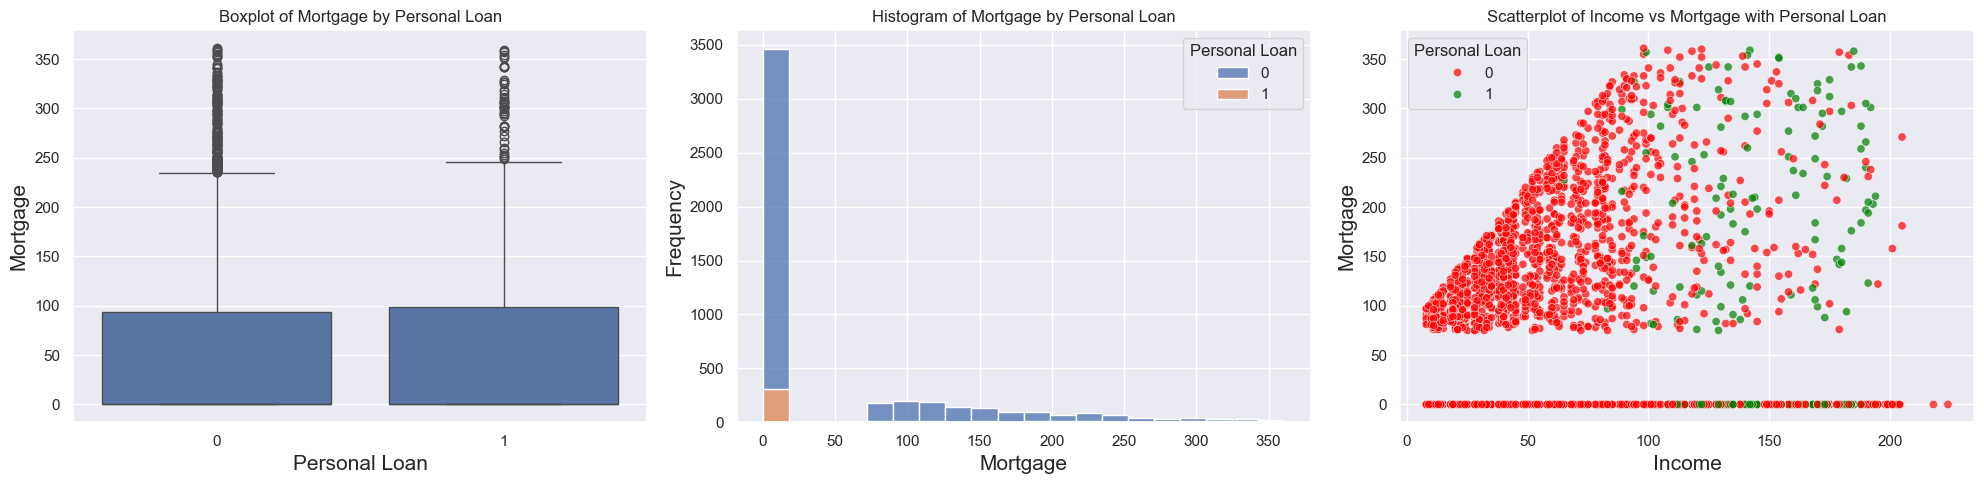

In [265]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(x="Personal Loan", y="Mortgage", data=df, ax=axes[0])
axes[0].set(xlabel='Personal Loan', ylabel='Mortgage', title='Boxplot of Mortgage by Personal Loan')

sns.histplot(data=df, x="Mortgage", hue="Personal Loan", bins=20, multiple="stack", ax=axes[1])
axes[1].set(xlabel='Mortgage', ylabel='Frequency', title='Histogram of Mortgage by Personal Loan')

sns.scatterplot(data=df, x="Income", y="Mortgage", hue="Personal Loan", palette=["red", "green"], ax=axes[2], alpha=0.7)
axes[2].set(xlabel='Income', ylabel='Mortgage', title='Scatterplot of Income vs Mortgage with Personal Loan')

plt.tight_layout()
plt.show()

Nhận xét:
- Đa số khách hàng có lượng thế chấp nhà là 0
- Mối quan hệ giữa thu nhập và khoản vay thế chấp là một mối quan hệ tuyến tính. Các điểm dữ liệu trở nên thưa thớt về cuối, điều này có thể giải thích bởi việc khách hàng có thu nhập cao đã thanh toán hoặc không còn có khoản vay thế chấp nữa.
- Mức khoản vay thế chấp cao hơn có nghĩa là một khách hàng có thể chấp nhận được một đề xuất vay cá nhân

# 6. Thiết lập các mô hình phân loại

## 6.1. Kiểm tra phân phối của giá trị cần phân loại

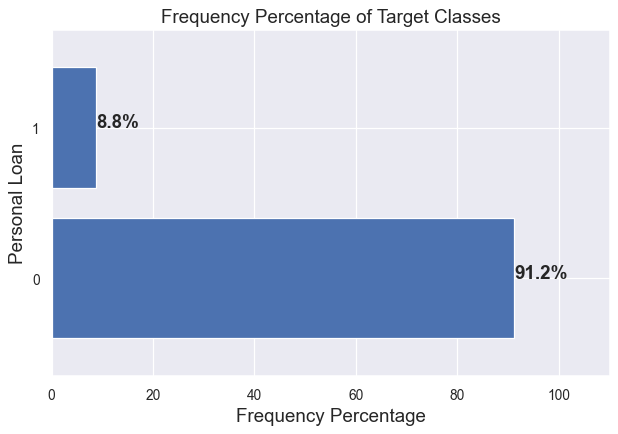

In [266]:
plt.figure(figsize=(35,20),dpi=90)
# Plot frequency percentages barplot
df['Personal Loan'].value_counts(normalize=True).mul(100).plot(kind='barh', width=0.8, figsize=(8,5))

# Add frequency percentages to the plot
labels = df['Personal Loan'].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlim([0, 110])
plt.xlabel('Frequency Percentage', fontsize=15)
plt.ylabel('Personal Loan', fontsize=15)
plt.title('Frequency Percentage of Target Classes', fontsize=15)
plt.show()

## 6.2. Ma trận tương quan giữa các cột

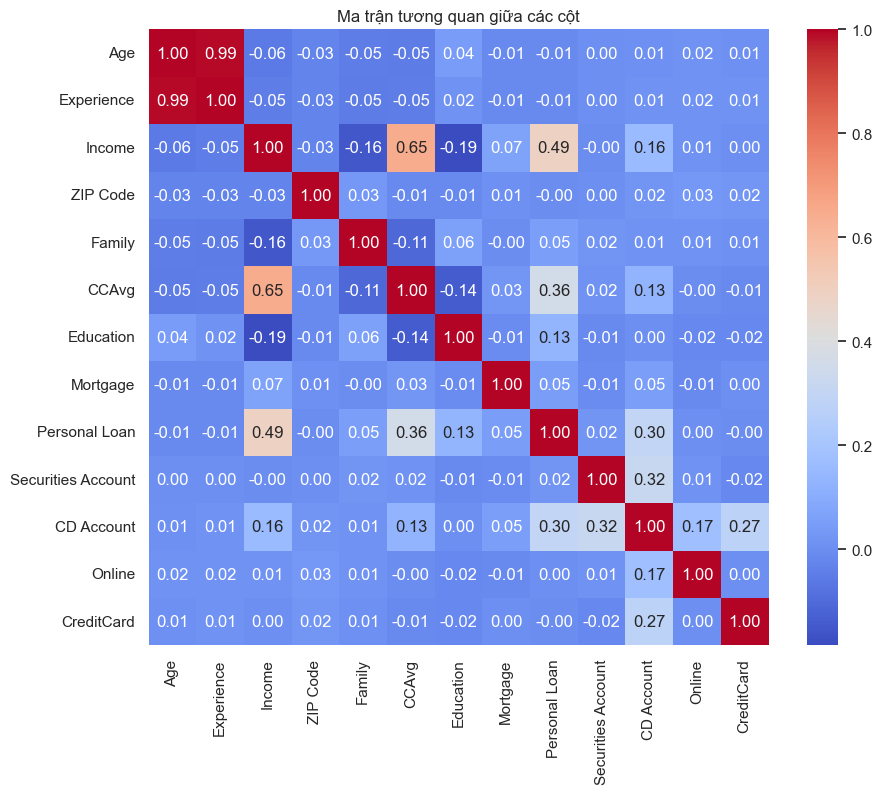

In [267]:
# Tính toán ma trận tương quan
correlation_matrix = df.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan giữa các cột')
plt.show()

#### Nhận xét:
- Ta thấy có 4 cột có mối tương quan cao so với <b>Personal Loan</b> là: <i>Income, CCAvg, Education, CD Account</i>
- Vậy có thể chia làm 2 trường hợp để tạo các mô hình phân loại <b>Personal Loan</b>

## 6.3. Phân chia dữ liệu thành 2 tập Train và Test
### Trường hợp 1: Chỉ có các cột có mối tương quan cao: Income, CCAvg, Education, CD Account

In [268]:
selected_features = ['Income', 'CCAvg', 'Education', 'CD Account', 'Personal Loan']
df_selected = df[selected_features]

# Train-Test Split cho trường hợp 1
X_selected = df_selected.drop('Personal Loan', axis=1)
y_selected = df_selected['Personal Loan']
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

### Trường hợp 2: Lấy tất cả các cột

In [269]:
# Trường hợp 2: Tất cả các cột trong df
X_all = df.drop('Personal Loan', axis=1)
y_all = df['Personal Loan']
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

## 6.4. Decission Tree Model
### Trường hợp 1:

In [270]:
# Xây dựng mô hình Decision Tree
dt_selected = DecisionTreeClassifier(random_state=42)
dt_selected.fit(X_train_selected, y_train_selected)

# Dự đoán trên tập huấn luyện
y_train_pred_selected = dt_selected.predict(X_train_selected)

# Đánh giá hiệu suất trên tập huấn luyện
accuracy_train_selected = accuracy_score(y_train_selected, y_train_pred_selected)

# In accuracy trên tập huấn luyện
print("Accuracy trên tập huấn luyện (trường hợp 1):", accuracy_train_selected)

# Dự đoán trên tập kiểm tra
y_test_pred_selected = dt_selected.predict(X_test_selected)

# Đánh giá hiệu suất
accuracy_test_selected = accuracy_score(y_test_selected, y_test_pred_selected)
print("Accuracy trên tập kiểm tra (trường hợp 1):", accuracy_test_selected)
print("Báo cáo phân loại (trường hợp 1):")
print(classification_report(y_test_selected, y_test_pred_selected))

Accuracy trên tập huấn luyện (trường hợp 1): 0.9984674329501916
Accuracy trên tập kiểm tra (trường hợp 1): 0.9713993871297242
Báo cáo phân loại (trường hợp 1):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       894
           1       0.89      0.76      0.82        85

    accuracy                           0.97       979
   macro avg       0.93      0.88      0.90       979
weighted avg       0.97      0.97      0.97       979



In [271]:
def plot_confusion_matrix(model, y_test, y_pred, case):
    # Tính toán confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Vẽ confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {type(model).__name__} (Trường hợp {case})')
    plt.show()

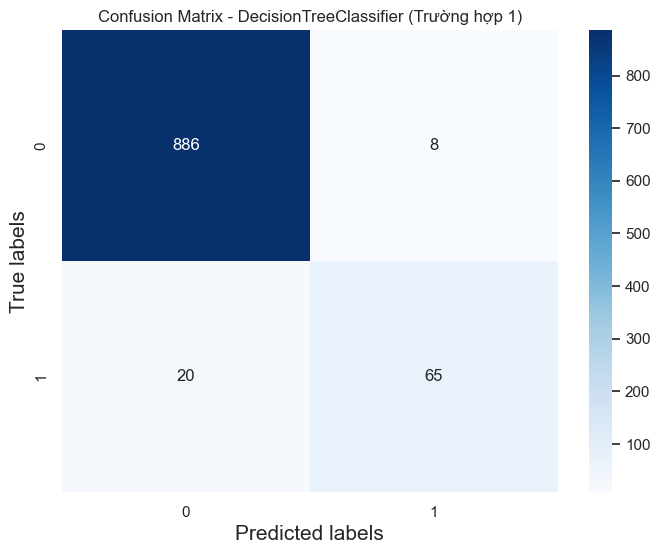

In [272]:
plot_confusion_matrix(dt_selected, y_test_selected, y_test_pred_selected, 1)

In [273]:
def plot_roc_curve(model, X_test, y_test, case):
    # Tính toán dự đoán xác suất
    y_pred_proba = model.predict_proba(X_test)[:,1]
    
    # Tính toán false positive rate, true positive rate và ngưỡng
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    # Tính toán diện tích dưới đường cong ROC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Vẽ ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {type(model).__name__} (Trường hợp {case})')
    plt.legend(loc="lower right")
    plt.show()

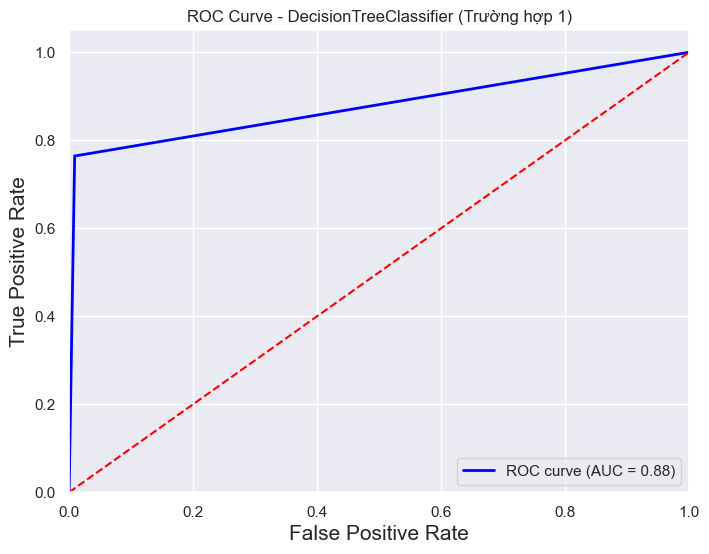

In [274]:
plot_roc_curve(dt_selected, X_test_selected, y_test_selected, 1)

### Trường hợp 2:

In [275]:
# Xây dựng mô hình Decision Tree
dt_all = DecisionTreeClassifier(random_state=42)
dt_all.fit(X_train_all, y_train_all)

# Dự đoán trên tập huấn luyện
y_train_pred_all = dt_all.predict(X_train_all)

# Đánh giá hiệu suất trên tập huấn luyện
accuracy_train_all = accuracy_score(y_train_all, y_train_pred_all)

# In accuracy trên tập huấn luyện
print("Accuracy trên tập huấn luyện (trường hợp 1):", accuracy_train_all)

# Dự đoán trên tập kiểm tra
y_pred_all = dt_all.predict(X_test_all)

# Đánh giá hiệu suất
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Accuracy trên tập kiểm tra (trường hợp 2):", accuracy_all)
print("Báo cáo phân loại (trường hợp 2):")
print(classification_report(y_test_all, y_pred_all))

Accuracy trên tập huấn luyện (trường hợp 1): 1.0
Accuracy trên tập kiểm tra (trường hợp 2): 0.982635342185904
Báo cáo phân loại (trường hợp 2):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       894
           1       0.89      0.92      0.90        85

    accuracy                           0.98       979
   macro avg       0.94      0.95      0.95       979
weighted avg       0.98      0.98      0.98       979



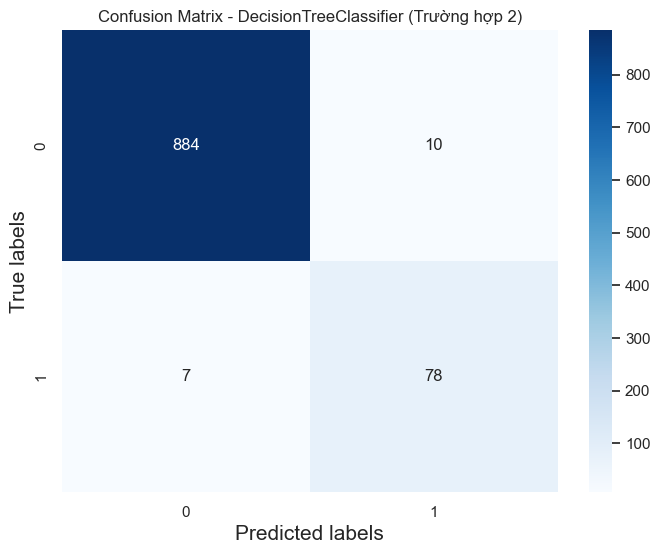

In [276]:
plot_confusion_matrix(dt_all, y_test_all, y_pred_all, 2)

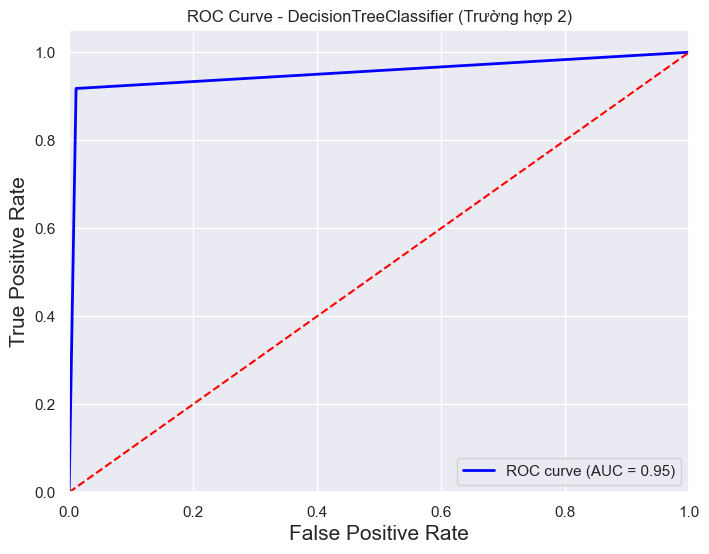

In [277]:
plot_roc_curve(dt_all, X_test_all, y_test_all, 2)

**Nhận xét**
- Decission Tree model khi thiết lập với tất cả thuộc tính thì sẽ tốt hơn so với model được tạo bởi các cột có độ tương quan cao

## 6.5. XGBClassifier Model
### Trường hợp 1:

In [278]:
# Xây dựng mô hình XGBClassifier
xgb_selected = XGBClassifier(random_state=42)
xgb_selected.fit(X_train_selected, y_train_selected)

# Dự đoán trên tập huấn luyện
y_train_pred_selected = xgb_selected.predict(X_train_selected)

# Đánh giá hiệu suất trên tập huấn luyện
accuracy_train_selected = accuracy_score(y_train_selected, y_train_pred_selected)

# In accuracy trên tập huấn luyện
print("Accuracy trên tập huấn luyện (trường hợp 1):", accuracy_train_selected)

# Dự đoán trên tập kiểm tra
y_pred_selected_xgb = xgb_selected.predict(X_test_selected)

# Đánh giá hiệu suất
accuracy_selected_xgb = accuracy_score(y_test_selected, y_pred_selected_xgb)
print("Accuracy trên tập kiểm tra (trường hợp 1, XGBoost):", accuracy_selected_xgb)
print("Báo cáo phân loại (trường hợp 1, XGBoost):")
print(classification_report(y_test_selected, y_pred_selected_xgb))

Accuracy trên tập huấn luyện (trường hợp 1): 0.9943805874840358
Accuracy trên tập kiểm tra (trường hợp 1, XGBoost): 0.9765066394279878
Báo cáo phân loại (trường hợp 1, XGBoost):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       894
           1       0.92      0.80      0.86        85

    accuracy                           0.98       979
   macro avg       0.95      0.90      0.92       979
weighted avg       0.98      0.98      0.98       979



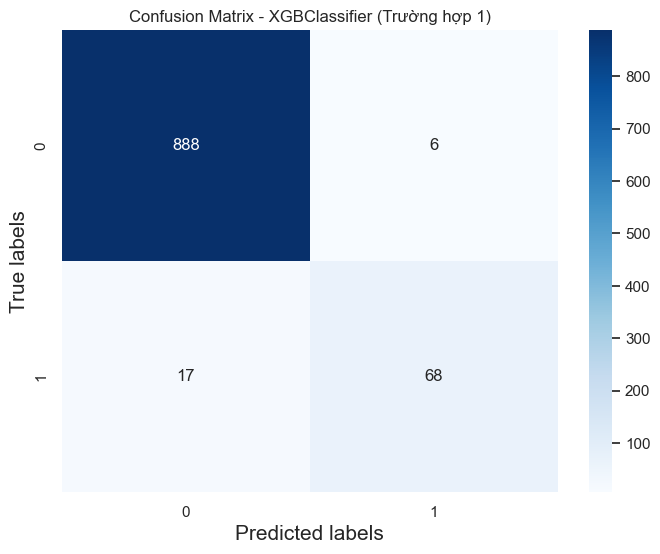

In [279]:
plot_confusion_matrix(xgb_selected, y_test_selected, y_pred_selected_xgb, 1)

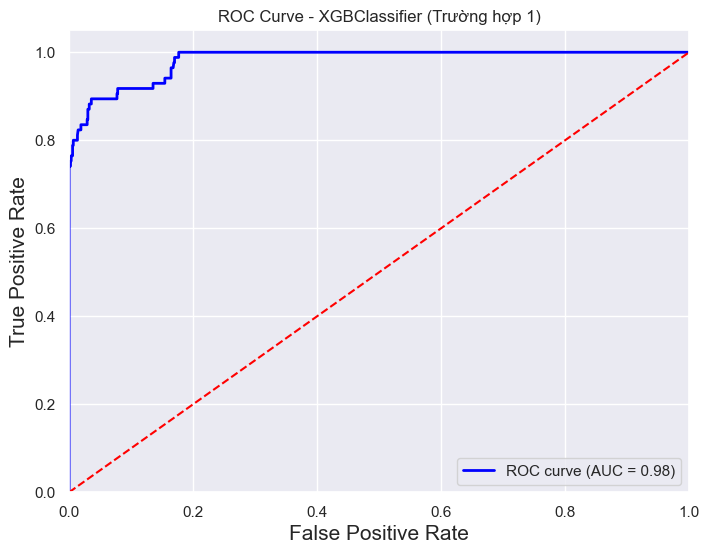

In [280]:
plot_roc_curve(xgb_selected, X_test_selected, y_test_selected, 1)

### Trường hợp 2:

In [281]:
# Xây dựng mô hình XGBClassifier
xgb_all = XGBClassifier(random_state=42)
xgb_all.fit(X_train_all, y_train_all)

# Dự đoán trên tập huấn luyện
y_train_pred_all = xgb_all.predict(X_train_all)

# Đánh giá hiệu suất trên tập huấn luyện
accuracy_train_all = accuracy_score(y_train_all, y_train_pred_all)

# In accuracy trên tập huấn luyện
print("Accuracy trên tập huấn luyện (trường hợp 1):", accuracy_train_all)

# Dự đoán trên tập kiểm tra
y_pred_all_xgb = xgb_all.predict(X_test_all)

# Đánh giá hiệu suất
accuracy_all_xgb = accuracy_score(y_test_all, y_pred_all_xgb)
print("Accuracy trên tập kiểm tra (trường hợp 2, XGBoost):", accuracy_all_xgb)
print("Báo cáo phân loại (trường hợp 2, XGBoost):")
print(classification_report(y_test_all, y_pred_all_xgb))

Accuracy trên tập huấn luyện (trường hợp 1): 1.0
Accuracy trên tập kiểm tra (trường hợp 2, XGBoost): 0.9897854954034729
Báo cáo phân loại (trường hợp 2, XGBoost):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       894
           1       0.93      0.95      0.94        85

    accuracy                           0.99       979
   macro avg       0.96      0.97      0.97       979
weighted avg       0.99      0.99      0.99       979



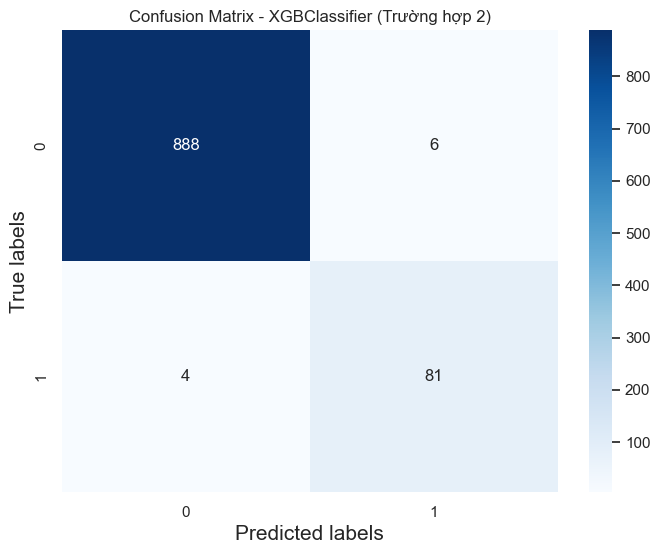

In [282]:
plot_confusion_matrix(xgb_all, y_test_all, y_pred_all_xgb, 2)

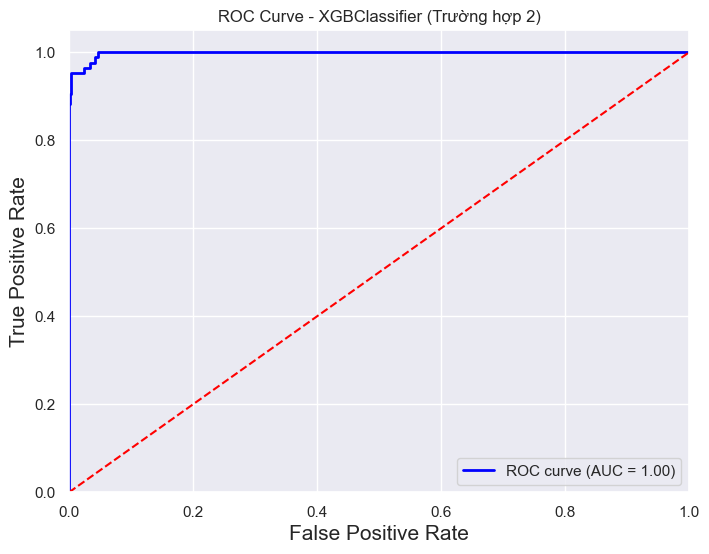

In [283]:
plot_roc_curve(xgb_all, X_test_all, y_test_all, 2)

- Model với tất cả thuộc tính có AUC cao hơn

## 6.6. KNeighborsClassifier Model
### Trường hợp 1:

In [284]:
# Xây dựng mô hình KNeighborsClassifier
knn_selected = KNeighborsClassifier()
knn_selected.fit(X_train_selected, y_train_selected)

# Dự đoán trên tập huấn luyện
y_train_pred_selected = knn_selected.predict(X_train_selected)

# Đánh giá hiệu suất trên tập huấn luyện
accuracy_train_selected = accuracy_score(y_train_selected, y_train_pred_selected)

# In accuracy trên tập huấn luyện
print("Accuracy trên tập huấn luyện (trường hợp 1):", accuracy_train_selected)

# Dự đoán trên tập kiểm tra
y_pred_selected_knn = knn_selected.predict(X_test_selected)

# Đánh giá hiệu suất
accuracy_selected_knn = accuracy_score(y_test_selected, y_pred_selected_knn)
print("Accuracy trên tập kiểm tra (trường hợp 1, KNeighbors):", accuracy_selected_knn)
print("Báo cáo phân loại (trường hợp 1, KNeighbors):")
print(classification_report(y_test_selected, y_pred_selected_knn))

Accuracy trên tập huấn luyện (trường hợp 1): 0.9491698595146871
Accuracy trên tập kiểm tra (trường hợp 1, KNeighbors): 0.9305413687436159
Báo cáo phân loại (trường hợp 1, KNeighbors):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       894
           1       0.65      0.42      0.51        85

    accuracy                           0.93       979
   macro avg       0.80      0.70      0.74       979
weighted avg       0.92      0.93      0.92       979



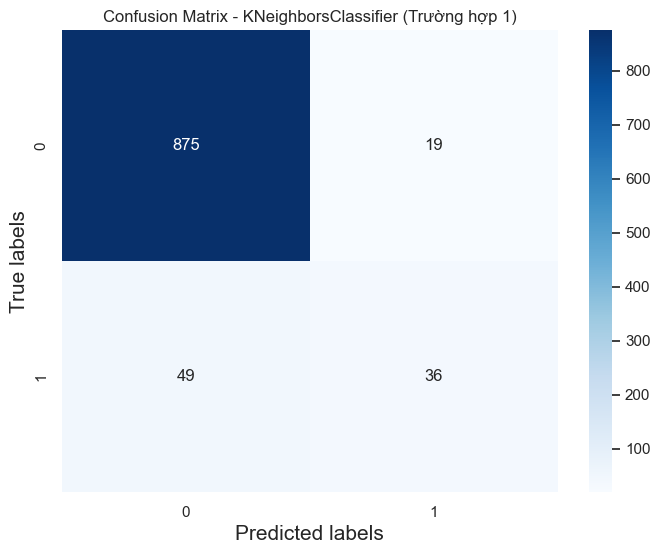

In [285]:
plot_confusion_matrix(knn_selected, y_test_selected, y_pred_selected_knn, 1)

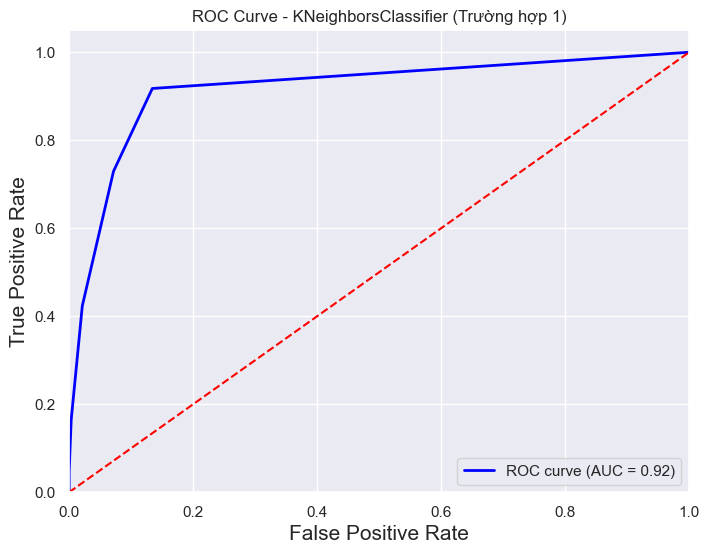

In [286]:
plot_roc_curve(knn_selected, X_test_selected, y_test_selected, 1)

### Trường hợp 2:

In [287]:
# Xây dựng mô hình KNeighborsClassifier
knn_all = KNeighborsClassifier()
knn_all.fit(X_train_all, y_train_all)

# Dự đoán trên tập huấn luyện
y_train_pred_all = knn_all.predict(X_train_all)

# Đánh giá hiệu suất trên tập huấn luyện
accuracy_train_all = accuracy_score(y_train_all, y_train_pred_all)

# In accuracy trên tập huấn luyện
print("Accuracy trên tập huấn luyện (trường hợp 1):", accuracy_train_all)

# Dự đoán trên tập kiểm tra
y_pred_all_knn = knn_all.predict(X_test_all)

# Đánh giá hiệu suất
accuracy_all_knn = accuracy_score(y_test_all, y_pred_all_knn)
print("Accuracy trên tập kiểm tra (trường hợp 2, KNeighbors):", accuracy_all_knn)
print("Báo cáo phân loại (trường hợp 2, KNeighbors):")
print(classification_report(y_test_all, y_pred_all_knn))

Accuracy trên tập huấn luyện (trường hợp 1): 0.9320561941251596
Accuracy trên tập kiểm tra (trường hợp 2, KNeighbors): 0.9172625127681308
Báo cáo phân loại (trường hợp 2, KNeighbors):
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       894
           1       0.56      0.24      0.33        85

    accuracy                           0.92       979
   macro avg       0.74      0.61      0.64       979
weighted avg       0.90      0.92      0.90       979



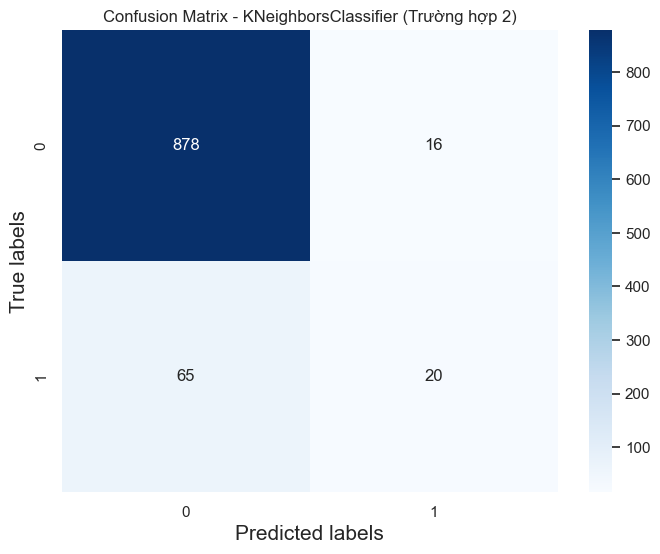

In [288]:
plot_confusion_matrix(knn_all, y_test_all, y_pred_all_knn, 2)

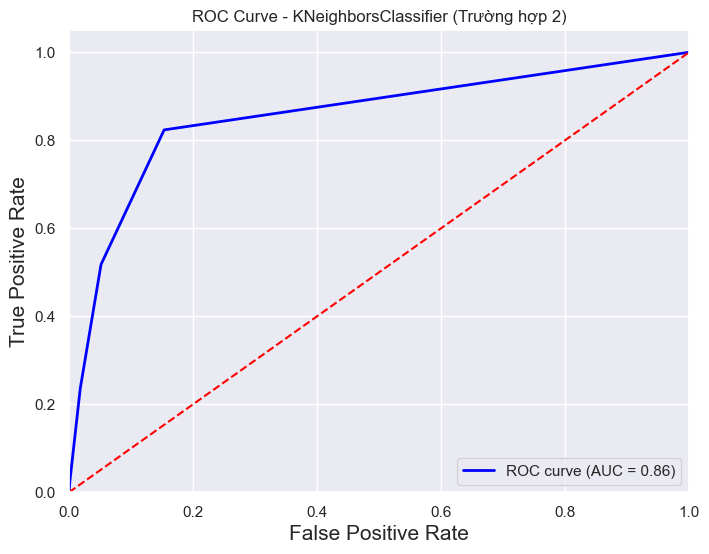

In [289]:
plot_roc_curve(knn_all, X_test_all, y_test_all, 2)

- Với KNeighbors Classifier Model thì sử dụng các cột tương quan cao thì cho ra AUC cao hơn

## 6.7. LogisticRegression Model
### Trường hợp 1:

In [290]:
# Xây dựng mô hình Logistic Regression
logreg_selected = LogisticRegression()
logreg_selected.fit(X_train_selected, y_train_selected)

# Dự đoán trên tập huấn luyện
y_train_pred_selected = logreg_selected.predict(X_train_selected)

# Đánh giá hiệu suất trên tập huấn luyện
accuracy_train_selected = accuracy_score(y_train_selected, y_train_pred_selected)

# In accuracy trên tập huấn luyện
print("Accuracy trên tập huấn luyện (trường hợp 1):", accuracy_train_selected)

# Dự đoán trên tập kiểm tra
y_pred_selected_logreg = logreg_selected.predict(X_test_selected)

# Đánh giá hiệu suất
accuracy_selected_logreg = accuracy_score(y_test_selected, y_pred_selected_logreg)
print("Accuracy trên tập kiểm tra (trường hợp 1, Logistic Regression):", accuracy_selected_logreg)
print("Báo cáo phân loại (trường hợp 1, Logistic Regression):")
print(classification_report(y_test_selected, y_pred_selected_logreg))

Accuracy trên tập huấn luyện (trường hợp 1): 0.9499361430395913
Accuracy trên tập kiểm tra (trường hợp 1, Logistic Regression): 0.9560776302349336
Báo cáo phân loại (trường hợp 1, Logistic Regression):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       894
           1       0.85      0.60      0.70        85

    accuracy                           0.96       979
   macro avg       0.91      0.79      0.84       979
weighted avg       0.95      0.96      0.95       979



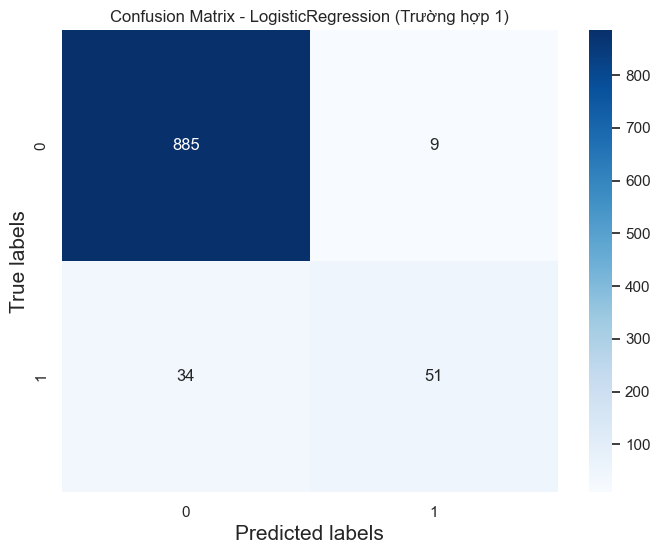

In [291]:
plot_confusion_matrix(logreg_selected, y_test_selected, y_pred_selected_logreg, 1)

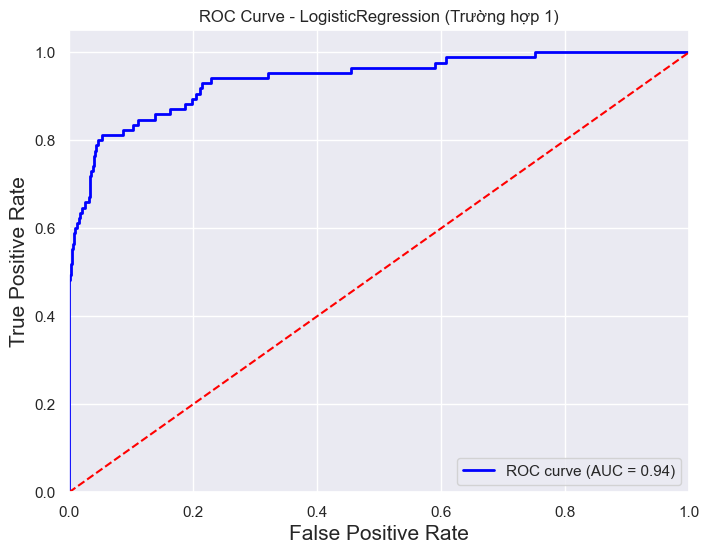

In [292]:
plot_roc_curve(logreg_selected, X_test_selected, y_test_selected, 1)

### Trường hợp 2:

In [293]:
# Xây dựng mô hình Logistic Regression
logreg_all = LogisticRegression()
logreg_all.fit(X_train_all, y_train_all)

# Dự đoán trên tập huấn luyện
y_train_pred_all = logreg_all.predict(X_train_all)

# Đánh giá hiệu suất trên tập huấn luyện
accuracy_train_all = accuracy_score(y_train_all, y_train_pred_all)

# In accuracy trên tập huấn luyện
print("Accuracy trên tập huấn luyện (trường hợp 1):", accuracy_train_all)

# Dự đoán trên tập kiểm tra
y_pred_all_logreg = logreg_all.predict(X_test_all)

# Đánh giá hiệu suất
accuracy_all_logreg = accuracy_score(y_test_all, y_pred_all_logreg)
print("Accuracy trên tập kiểm tra (trường hợp 2, Logistic Regression):", accuracy_all_logreg)
print("Báo cáo phân loại (trường hợp 2, Logistic Regression):")
print(classification_report(y_test_all, y_pred_all_logreg))

Accuracy trên tập huấn luyện (trường hợp 1): 0.9425287356321839
Accuracy trên tập kiểm tra (trường hợp 2, Logistic Regression): 0.9448416751787538
Báo cáo phân loại (trường hợp 2, Logistic Regression):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       894
           1       0.74      0.56      0.64        85

    accuracy                           0.94       979
   macro avg       0.85      0.77      0.81       979
weighted avg       0.94      0.94      0.94       979



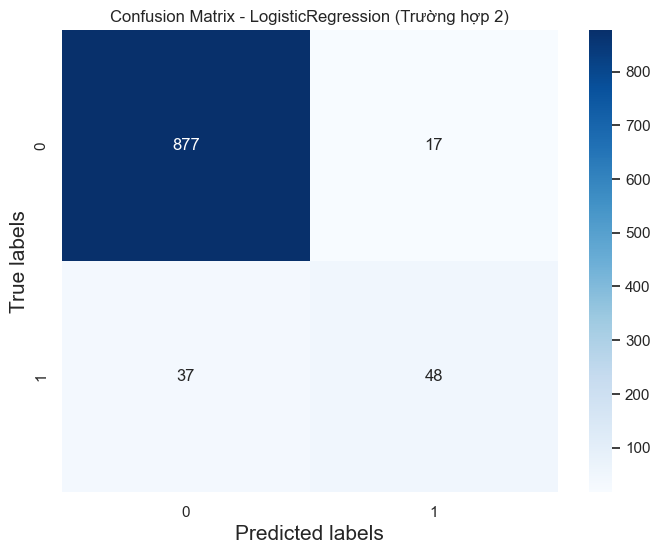

In [294]:
plot_confusion_matrix(logreg_all, y_test_all, y_pred_all_logreg, 2)

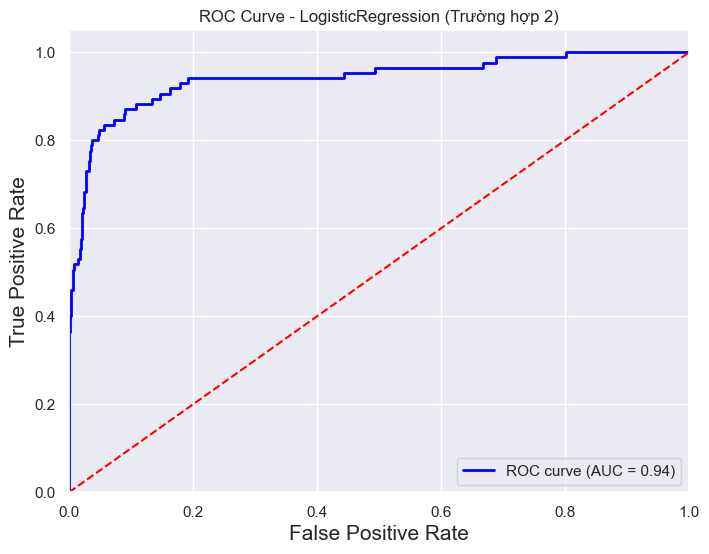

In [295]:
plot_roc_curve(logreg_all, X_test_all, y_test_all, 2)

- Logistic Regression Model thì cho ra AUC bằng nhau

## 6.8. RandomForest Model
### Trường hợp 1:

In [296]:
# Xây dựng mô hình RandomForest
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train_selected)

# Dự đoán trên tập huấn luyện
y_train_pred_selected = rf_selected.predict(X_train_selected)

# Đánh giá hiệu suất trên tập huấn luyện
accuracy_train_selected = accuracy_score(y_train_selected, y_train_pred_selected)

# In accuracy trên tập huấn luyện
print("Accuracy trên tập huấn luyện (trường hợp 1):", accuracy_train_selected)

# Dự đoán trên tập kiểm tra
y_pred_selected_rf = rf_selected.predict(X_test_selected)

# Đánh giá hiệu suất
accuracy_selected_rf = accuracy_score(y_test_selected, y_pred_selected_rf)
print("Accuracy trên tập kiểm tra (trường hợp 1, RandomForest):", accuracy_selected_rf)
print("Báo cáo phân loại (trường hợp 1, RandomForest):")
print(classification_report(y_test_selected, y_pred_selected_rf))

Accuracy trên tập huấn luyện (trường hợp 1): 0.9984674329501916
Accuracy trên tập kiểm tra (trường hợp 1, RandomForest): 0.975485188968335
Báo cáo phân loại (trường hợp 1, RandomForest):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       894
           1       0.92      0.79      0.85        85

    accuracy                           0.98       979
   macro avg       0.95      0.89      0.92       979
weighted avg       0.97      0.98      0.97       979



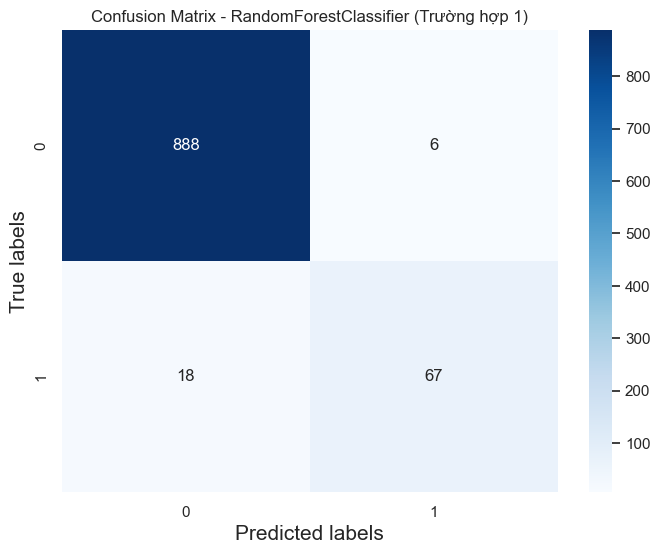

In [297]:
plot_confusion_matrix(rf_selected, y_test_selected, y_pred_selected_rf, 1)

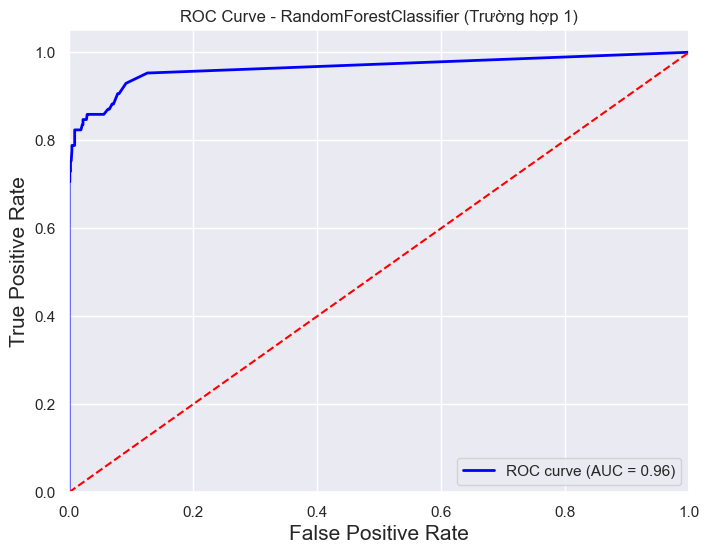

In [298]:
plot_roc_curve(rf_selected, X_test_selected, y_test_selected, 1)

### Trường hợp 2:

In [299]:
# Xây dựng mô hình RandomForest
rf_all = RandomForestClassifier(random_state=42)
rf_all.fit(X_train_all, y_train_all)

# Dự đoán trên tập huấn luyện
y_train_pred_all = rf_all.predict(X_train_all)

# Đánh giá hiệu suất trên tập huấn luyện
accuracy_train_all = accuracy_score(y_train_all, y_train_pred_all)

# In accuracy trên tập huấn luyện
print("Accuracy trên tập huấn luyện (trường hợp 1):", accuracy_train_all)

# Dự đoán trên tập kiểm tra
y_pred_all_rf = rf_all.predict(X_test_all)

# Đánh giá hiệu suất
accuracy_all_rf = accuracy_score(y_test_all, y_pred_all_rf)
print("Accuracy trên tập kiểm tra (trường hợp 2, RandomForest):", accuracy_all_rf)
print("Báo cáo phân loại (trường hợp 2, RandomForest):")
print(classification_report(y_test_all, y_pred_all_rf))

Accuracy trên tập huấn luyện (trường hợp 1): 1.0
Accuracy trên tập kiểm tra (trường hợp 2, RandomForest): 0.992849846782431
Báo cáo phân loại (trường hợp 2, RandomForest):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       894
           1       0.99      0.93      0.96        85

    accuracy                           0.99       979
   macro avg       0.99      0.96      0.98       979
weighted avg       0.99      0.99      0.99       979



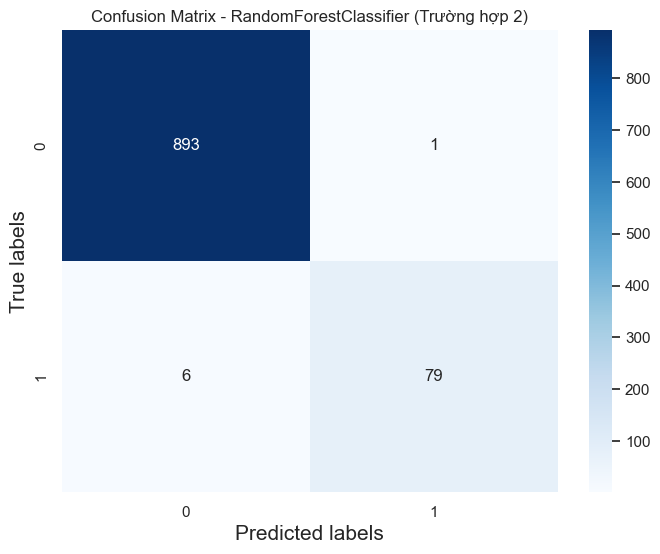

In [300]:
plot_confusion_matrix(rf_all, y_test_all, y_pred_all_rf, 2)

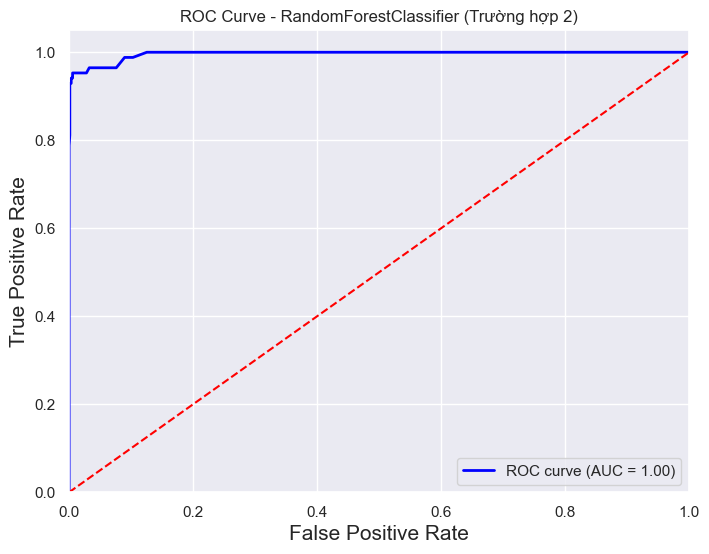

In [301]:
plot_roc_curve(rf_all, X_test_all, y_test_all, 2)

- Random Forest Model khi dùng tất cả các thuộc tính thì cho ra kết quả dự báo chính xác hơn khi dùng các cột có tương quan cao

## 7. Đánh giá tổng quan tất cả các mô hình

* Tính toán các chỉ số đánh giá hiệu suất cho một mô hình máy học đã được huấn luyện dựa trên test data.

In [302]:
def metrics_calculator(clf, X_test, y_test, model_name):
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                            index=['Accuracy','Precision','Recall','F1-score','AUC'],
                            columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

* Thực hiện đánh giá tổng quan các mô hình học máy đã chạy

In [303]:
dt_result = metrics_calculator(dt_all, X_test_all, y_test_all, 'Decision Tree')
logreg_result = metrics_calculator(logreg_all, X_test_all, y_test_all, 'Logistic Regression')
rf_result = metrics_calculator(rf_all, X_test_all, y_test_all, 'Random Forest')
knn_result = metrics_calculator(knn_all, X_test_all, y_test_all, 'KNeighbors')
xgb_result = metrics_calculator(xgb_all, X_test_all, y_test_all, 'XGBoost')

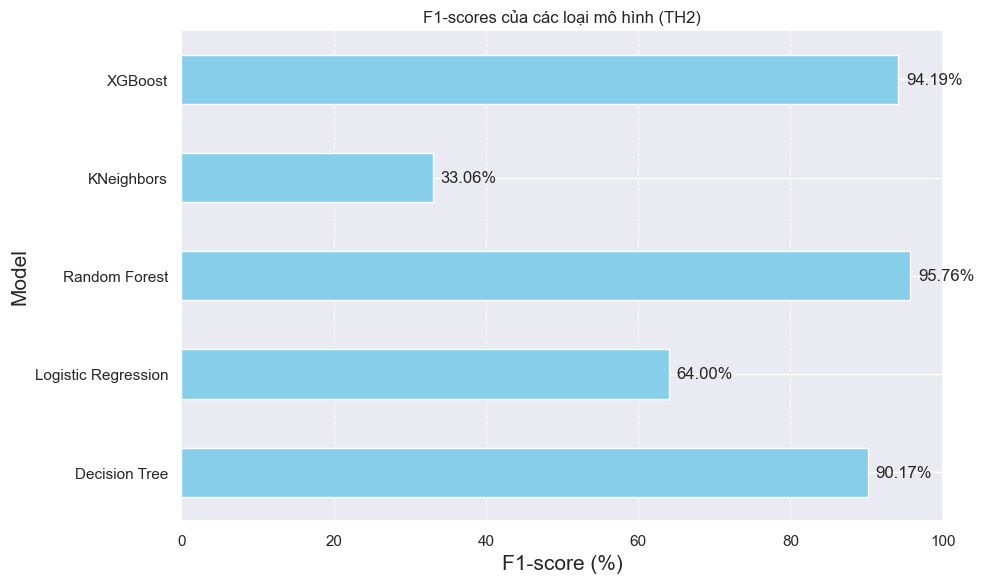

In [304]:
# Concatenate all results into a single DataFrame for comparison
all_results = pd.concat([dt_result, logreg_result, rf_result, knn_result, xgb_result], axis=1)

# Extract the F1-scores
f1_scores = all_results.loc['F1-score']

# Convert the F1-scores to numeric values (they are currently strings with '%')
f1_scores_numeric = f1_scores.str.replace('%', '').astype(float)

# Plotting the F1-scores as a horizontal bar chart
plt.figure(figsize=(10, 6))
ax = f1_scores_numeric.plot(kind='barh', color='skyblue')
plt.title('F1-scores của các loại mô hình (TH2)')
plt.xlabel('F1-score (%)')
plt.ylabel('Model')
plt.xlim(0, 100)  # Setting the x-axis limits for better visualization
plt.grid(axis='x', linestyle='--', linewidth=0.7)

# Annotate bars with F1-score values
for index, value in enumerate(f1_scores_numeric):
    plt.text(value + 1, index, f'{value:.2f}%', va='center')

# Show plot
plt.tight_layout()
plt.show()

* Từ biểu đồ ta có thể thấy mô hình Random Forest là mô hình có chỉ số F1-Score tốt nhất trong 5 mô hình

* Tiếp tục vẽ cho TH1

In [305]:
dt_result = metrics_calculator(dt_selected, X_test_selected, y_test_selected, 'Decision Tree')
logreg_result = metrics_calculator(logreg_selected, X_test_selected, y_test_selected, 'Logistic Regression')
rf_result = metrics_calculator(rf_selected, X_test_selected, y_test_selected, 'Random Forest')
knn_result = metrics_calculator(knn_selected, X_test_selected, y_test_selected, 'KNeighbors')
xgb_result = metrics_calculator(xgb_selected, X_test_selected, y_test_selected, 'XGBoost')

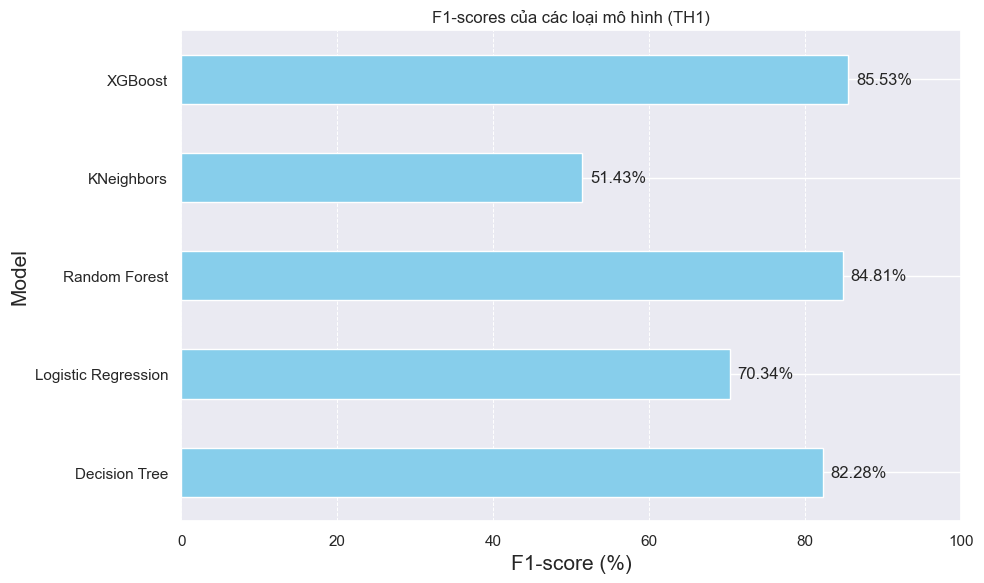

In [306]:
selected_results = pd.concat([dt_result, logreg_result, rf_result, knn_result, xgb_result], axis=1)

# F1-scores
f1_scores = selected_results.loc['F1-score']

# Chuyển đổi F1-scores sang giá trị numeric values
f1_scores_numeric = f1_scores.str.replace('%', '').astype(float)

# Vẽ F1-scores
plt.figure(figsize=(10, 6))
ax = f1_scores_numeric.plot(kind='barh', color='skyblue')
plt.title('F1-scores của các loại mô hình (TH1)')
plt.xlabel('F1-score (%)')
plt.ylabel('Model')
plt.xlim(0, 100) 
plt.grid(axis='x', linestyle='--', linewidth=0.7)

# Chú thích các thanh với giá trị F1-score
for index, value in enumerate(f1_scores_numeric):
    plt.text(value + 1, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

* Biểu đồ cho ta thấy chỉ số F1-Scores tương tự như khi dự đoán trên tất cả các trường 3 mô hình có chỉ số F1-scores đáng tin cậy là XGBoost, Random Forest và Decision Tree trong đó XGBoost vẫn là mô hình tốt nhất.

## 8. Kết luận

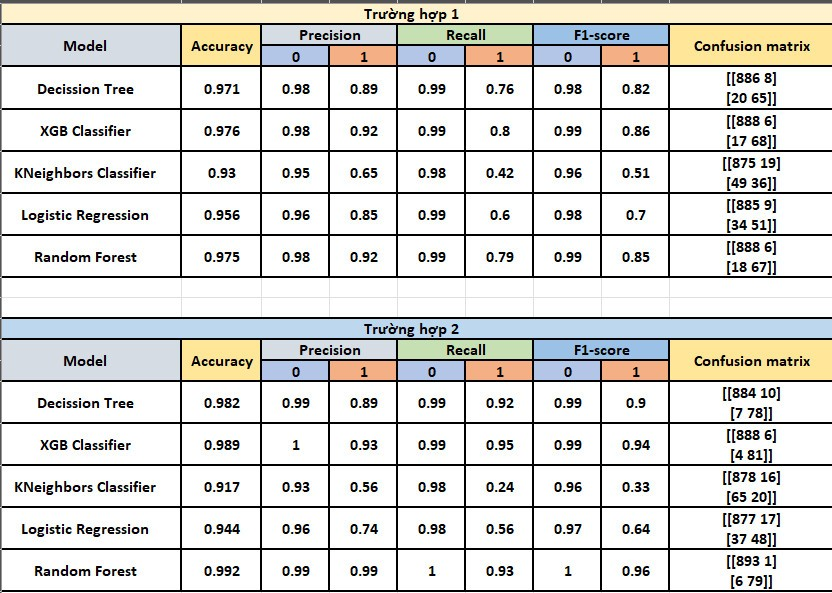

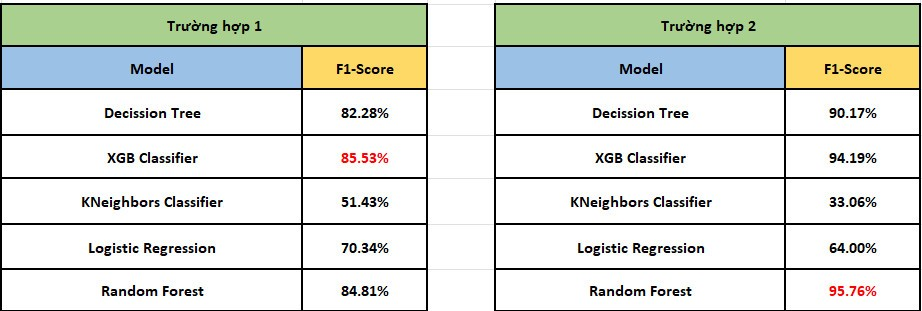

> Với tập dữ liệu này thì các mô hình đạt kết quả dự đoán tốt khi sử dụng toàn bộ tập dữ liệu để dự đoán. Với chỉ số F1-Score đạt tới 95% (của Random forest)

> Decission Tree/XGB Classifier và Random Forest đều có độ chính xác cao khi chạy mô hình đạt 98%. 

> Xét về chỉ số F1-score thi tỷ lệ % của Random Forest và XGB Classifier cao  nên có thể lựa 1 trong 2 mô hinh này để áp dụng dự đoán.


> Kết hợp với việc phân tích dữ liệu ban đầu (EDA) để nhận diện được những khách hàng có tiềm năng cho vay cá nhân.

* Trong tương lai: Sẽ tập trung vào những người có xu hướng quan tâm đến vay cá nhân:   
     - Dựa vào độ tuổi: Tỷ lệ những người còn cao tuổi hoặc khoảng xung quanh 40 tuổi.
     - Dựa vào độ tuổi và kinh nghiệm làm việc: Những người có độ tuổi trung niên trở đi và có kinh nghiệm khoảng 10 năm trong công việc.
     - Dựa vào số lượng thành viên trong gia đình và trình độ học vấn: Những người có số lượng thành viên trong gia đình cao và trình độ học vấn cao.
     - Dựa vào yếu tố có tài khoản ngân hàng: Những người đã có tham gia gửi tiền tại ngân hàng.
     - Dựa vào chi tiêu: Những người có lượng chi tiêu trung bình càng cao.
     
=> Ngân hàng nên xây dựng chính sách/chương trình/quyền lợi cho các đối tượng trên. Đây chính là các đối tượng tiềm năng để thu hút được nhiều khách hàng có tiềm năng tham gia khoản vay cá nhân.

> Nhóm xây dựng một số chương trình cho Ngân hàng như sau:
1. Chương trình vay lãi suất ưu đãi cho khách hàng trung niên và cao tuổi:
* Mục tiêu: Khách hàng có độ tuổi từ 40 trở lên, đặc biệt là những người đã về hưu.
* Chính sách: Cung cấp các gói vay với lãi suất ưu đãi và điều kiện vay linh hoạt hơn. Có thể kết hợp với bảo hiểm sức khỏe hoặc các dịch vụ tài chính khác nhằm tạo sự hấp dẫn.

2. Chương trình vay hỗ trợ sự nghiệp cho khách hàng có kinh nghiệm làm việc:
* Mục tiêu: Khách hàng trung niên và có kinh nghiệm làm việc từ 10 năm trở lên.
* Chính sách: Các gói vay với điều kiện tốt, như lãi suất thấp, thời gian trả nợ dài hơn, hoặc miễn phí một số loại phí. Đặc biệt nhấn mạnh đến việc hỗ trợ các kế hoạch phát triển cá nhân hoặc khởi nghiệp.

3. Chương trình vay dành cho gia đình có nhiều thành viên và trình độ học vấn cao:
* Mục tiêu: Khách hàng có gia đình đông thành viên và có trình độ học vấn cao.
* Chính sách: Gói vay có ưu đãi dành cho các gia đình, như lãi suất thấp hơn, ưu đãi khi vay để mua sắm, sửa chữa nhà cửa, hoặc đầu tư vào giáo dục cho con cái.

4. Chương trình ưu đãi cho khách hàng đã có tài khoản ngân hàng:
* Mục tiêu: Khách hàng đã có tài khoản tiết kiệm hoặc giao dịch thường xuyên tại ngân hàng.
* Chính sách: Cung cấp các gói vay với lãi suất ưu đãi cho những khách hàng đã có lịch sử giao dịch tốt hoặc số dư tài khoản cao. Tặng điểm thưởng hoặc ưu đãi khi sử dụng các dịch vụ khác của ngân hàng.

5. Chương trình vay cho khách hàng có mức chi tiêu cao:
* Mục tiêu: Khách hàng có mức chi tiêu trung bình hàng tháng cao.
* Chính sách: Các gói vay với hạn mức cao, lãi suất cạnh tranh, và các ưu đãi khi sử dụng thẻ tín dụng hoặc các dịch vụ thanh toán khác của ngân hàng.

6. Chương trình tài chính cá nhân toàn diện:
* Mục tiêu: Khách hàng có nhu cầu vay cho nhiều mục đích khác nhau.
* Chính sách: Xây dựng các gói tài chính cá nhân linh hoạt, cho phép khách hàng vay cho nhiều mục đích khác nhau như tiêu dùng, mua sắm, du lịch, học tập... với các điều kiện và ưu đãi tùy chỉnh.

7. Chương trình hỗ trợ tài chính giáo dục:
* Mục tiêu: Khách hàng có con cái đang trong độ tuổi đi học.
* Chính sách: Các gói vay với lãi suất thấp hoặc miễn lãi suất trong năm đầu tiên cho các khoản vay phục vụ chi phí giáo dục, từ học phí đến các chi phí khác liên quan đến học tập.

8. Chương trình khách hàng thân thiết và tích điểm:
* Mục tiêu: Tất cả các đối tượng khách hàng.
* Chính sách: Tích điểm khi sử dụng dịch vụ của ngân hàng, từ đó đổi điểm lấy các ưu đãi về lãi suất, phí dịch vụ, hoặc các phần quà giá trị.